In [2]:
# Install specific versions
# !pip install tensorflow==2.13.0
# !pip install opencv-python==4.8.0.74

En este fragmento de código se importan varias bibliotecas esenciales para el procesamiento de datos y la creación de modelos en Python. Se importa numpy para realizar operaciones numéricas, matplotlib.pyplot para visualización gráfica de datos, tensorflow para crear y entrenar modelos de aprendizaje automático, y cv2 (OpenCV) para el procesamiento de imágenes.

In [3]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
import cv2
print(cv2.__version__)

2.18.0
4.11.0


Se importa el conjunto de datos MNIST, que es una base de datos estándar de imágenes de dígitos escritos a mano.

In [5]:
# Import dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# Print the shape of data
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


Se analiza y visualiza la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

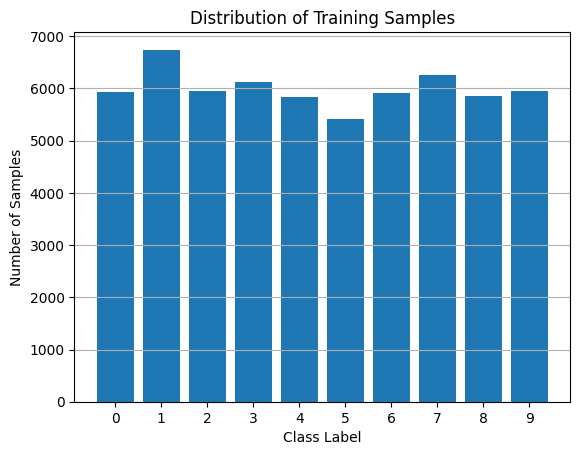

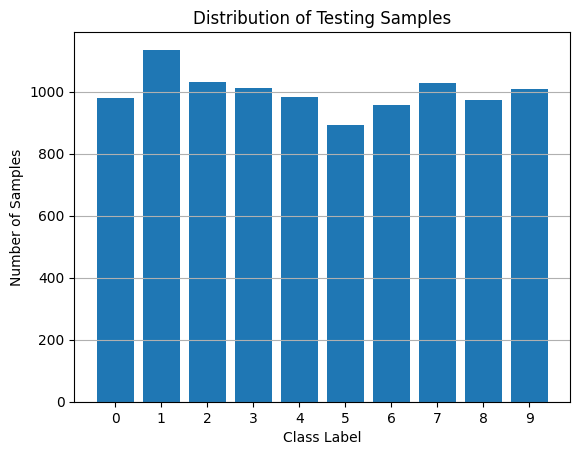

In [7]:
# Check class proportions
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribution of Training Samples')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()

unique, counts = np.unique(test_labels, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribution of Testing Samples')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()

Se visualizan las primeras 10 imágenes del conjunto de entrenamiento (MNIST). Utilizando matplotlib, se crea una figura con un tamaño específico y se organizan las imágenes en una cuadrícula de 2 filas y 5 columnas.

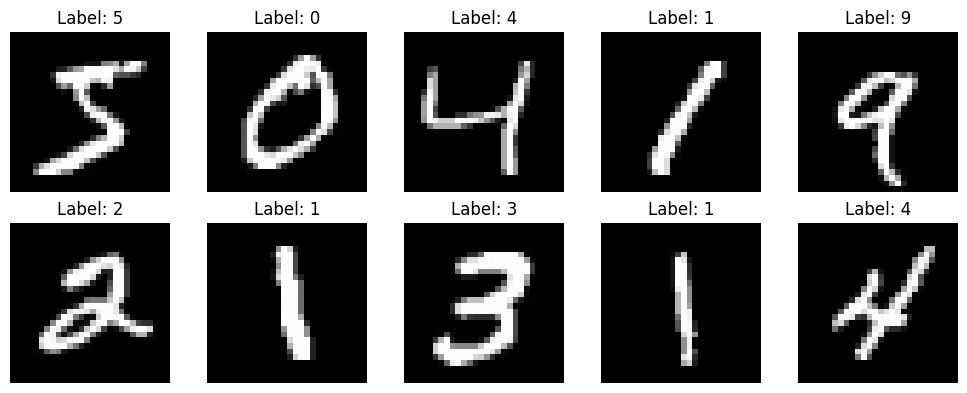

In [8]:
# Plotting first few images from the training set
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()

In [9]:
# Range of the data
print(f"Min pixel value in training set: {train_images.min()}")
print(f"Max pixel value in training set: {train_images.max()}")

Min pixel value in training set: 0
Max pixel value in training set: 255


Se crea un modelo de red neuronal feedforward (perceptrón multicapa) utilizando Keras, una API de alto nivel para construir y entrenar modelos de aprendizaje automático con TensorFlow.

In [10]:
# Import keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create simple feedforward neural network
model = Sequential()
# Input Layer: Flatten the 28x28 image data
model.add(Flatten(input_shape=(28, 28)))
# Hidden Layer 1: 128 units with ReLU activation
model.add(Dense(128, activation='relu'))
# Hidden Layer 2: 64 units with ReLU activation
model.add(Dense(64, activation='relu'))
# Output Layer: 10 units for 10 classes with softmax activation for probability distribution
model.add(Dense(10, activation='softmax'))
# Specify optimizer
opt = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Print a summary of the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Se configura un callback de detención temprana (early stopping) para evitar el sobreajuste durante el entrenamiento del modelo.

In [11]:
# Create early stoppingg callback
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
# Training the model
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.4, batch_size=80, callbacks=[early_stop])

Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5090 - loss: 26.8011 - val_accuracy: 0.7935 - val_loss: 4.4016
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8172 - loss: 3.6739 - val_accuracy: 0.8525 - val_loss: 2.6798
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8684 - loss: 2.1456 - val_accuracy: 0.8723 - val_loss: 2.0416
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8945 - loss: 1.5093 - val_accuracy: 0.8865 - val_loss: 1.6727
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9146 - loss: 1.0926 - val_accuracy: 0.8981 - val_loss: 1.4801
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9272 - loss: 0.8051 - val_accuracy: 0.9027 - val_loss: 1.3163
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9367 - loss: 0.6195 - val_accuracy: 0.9076 - val_loss: 1.2103
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9460 - loss: 0.4729 - val_accuracy: 0

En este fragmento de código, se visualizan y muestran los resultados del entrenamiento del modelo mediante gráficos de la precisión y pérdida durante las épocas de entrenamiento y validación.

Final Training Accuracy: 0.9944
Final Validation Accuracy: 0.9668
Final Training Loss: 0.0277
Final Validation Loss: 0.1155


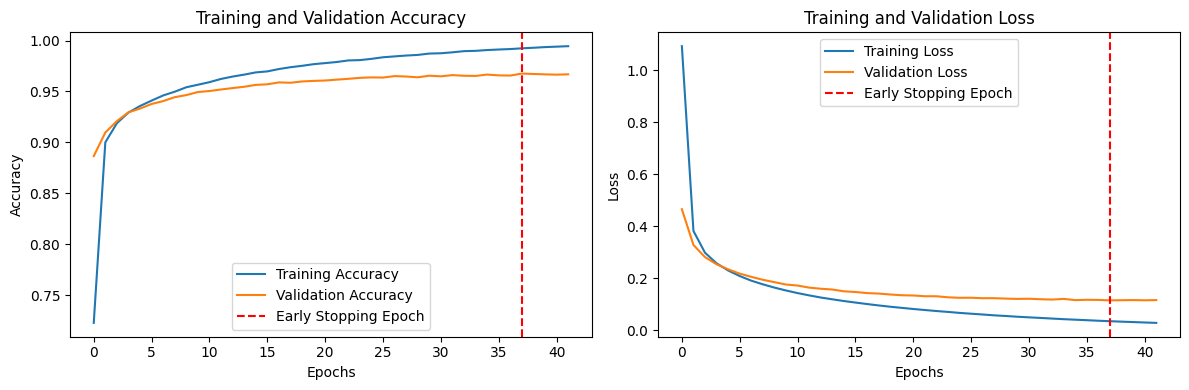

In [38]:
from matplotlib.ticker import MaxNLocator

stopped_epoch = early_stop.stopped_epoch
best_epoch = stopped_epoch - early_stop.patience

# Obtener la exactitud final en entrenamiento y validación
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Imprimir la exactitud final
print(f'Final Training Accuracy: {train_accuracy:.4f}')
print(f'Final Validation Accuracy: {val_accuracy:.4f}')
print(f'Final Training Loss: {train_loss:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

plt.figure(figsize=(12, 4))

# Gráfico de precisión de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Asegurar valores enteros en el eje x
plt.legend()

# Gráfico de pérdida de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Asegurar valores enteros en el eje x
plt.legend()

plt.tight_layout()
plt.show()

Podemos ver que se supone que tiene una buena accuracy :)

In [39]:
# Evaluate the model on the test set
test_accuracy = model.evaluate(test_images, test_labels, verbose=0)[1]
print(f'Test Accuracy: {test_accuracy:.4f}')

# Compare with the validation accuracy
if test_accuracy < val_accuracy:
    print("El modelo podría estar sobreajustado, ya que la exactitud de validación es mejor que la de prueba.")
else:
    print("El modelo está generalizando bien, ya que la exactitud de prueba es comparable a la de validación.")

Test Accuracy: 0.9716
El modelo está generalizando bien, ya que la exactitud de prueba es comparable a la de validación.


In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [14]:
# Capture an image
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

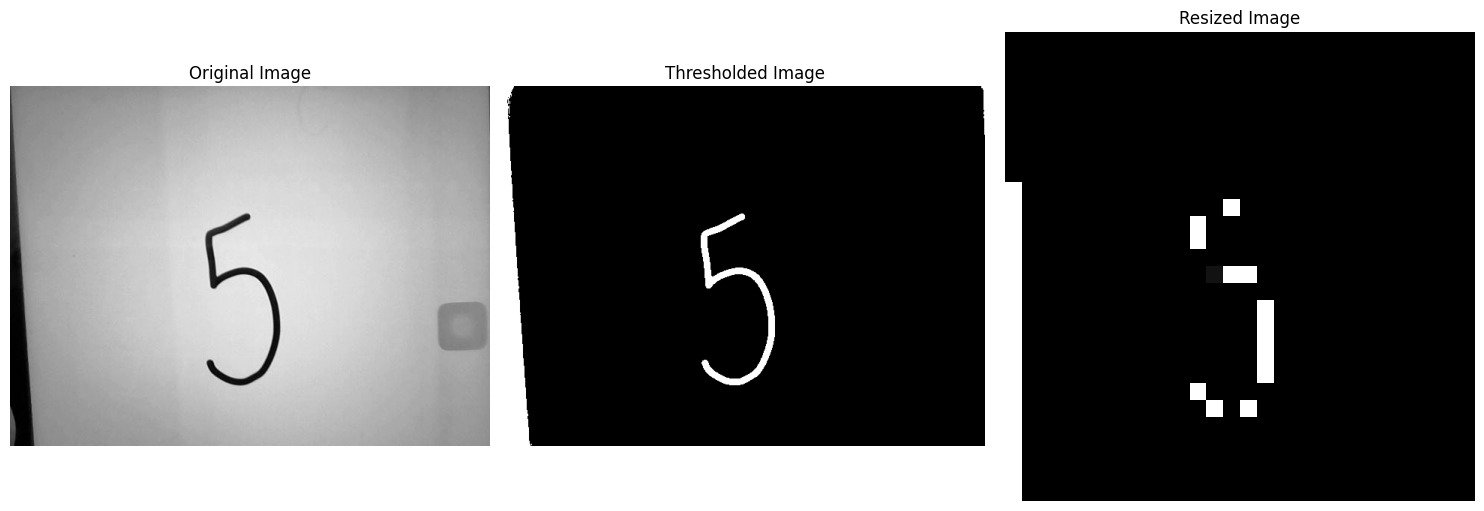

In [15]:
# Load the image
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding
_, thresh = cv2.threshold(image, 105, 255, cv2.THRESH_BINARY_INV)

# Resize the image to 28x28 pixels
resized = cv2.resize(thresh, (28, 28))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Thresholded Image
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

# Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.59726
  4   |   0.40213
  5   |   0.00000
  6   |   0.00000
  7   |   0.00017
  8   |   0.00000
  9   |   0.00044
The predicted digit is: 3


In [17]:
# Save the model
model.save("my_model.h5")

Podemos ver que desde aquí nos damos cuenta que no hace muy buenas predicciones.

Esta parte de código carga imágenes en formato .PNG desde Google Drive, las convierte a escala de grises, les aplica un umbral para obtener una imagen binaria, y luego redimensiona cada imagen a 28x28 píxeles. Posteriormente, se visualizan tres versiones de cada imagen: la original, la umbralizada y la redimensionada

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivos en el directorio: ['IMG_1905.PNG', 'IMG_1856.PNG', 'IMG_1855.PNG', 'IMG_1899.PNG', 'IMG_1864.PNG', 'IMG_1865.PNG', 'IMG_1854.PNG', 'IMG_1869.PNG', 'IMG_1901.PNG', 'IMG_1874.PNG', 'IMG_1884.PNG', 'IMG_1900.PNG', 'IMG_1858.PNG', 'IMG_1859.PNG', 'IMG_1876.PNG', 'IMG_1875.PNG', 'IMG_1870.PNG', 'IMG_1879.PNG', 'IMG_1866.PNG', 'IMG_1889.PNG', 'IMG_1860.PNG', 'IMG_1891.PNG', 'IMG_1863.PNG', 'IMG_1868.PNG', 'IMG_1857.PNG', 'IMG_1873.PNG', 'IMG_1894.PNG', 'IMG_1904.PNG', 'IMG_1881.PNG', 'IMG_1890.PNG', 'IMG_1878.PNG', 'IMG_1867.PNG', 'IMG_1896.PNG', 'IMG_1871.PNG', 'IMG_1885.PNG', 'IMG_1862.PNG', 'IMG_1877.PNG', 'IMG_1861.PNG', 'IMG_1883.PNG', 'IMG_1886.PNG', 'IMG_1888.PNG', 'IMG_1880.PNG', 'IMG_1887.PNG', 'IMG_1882.PNG', 'IMG_1872.PNG', 'IMG_1893.PNG', 'IMG_1898.PNG', 'IMG_1892.PNG', 'IMG_1895.PNG', 'IMG_1897.PNG']
Archivos encontrados: 50 imágenes


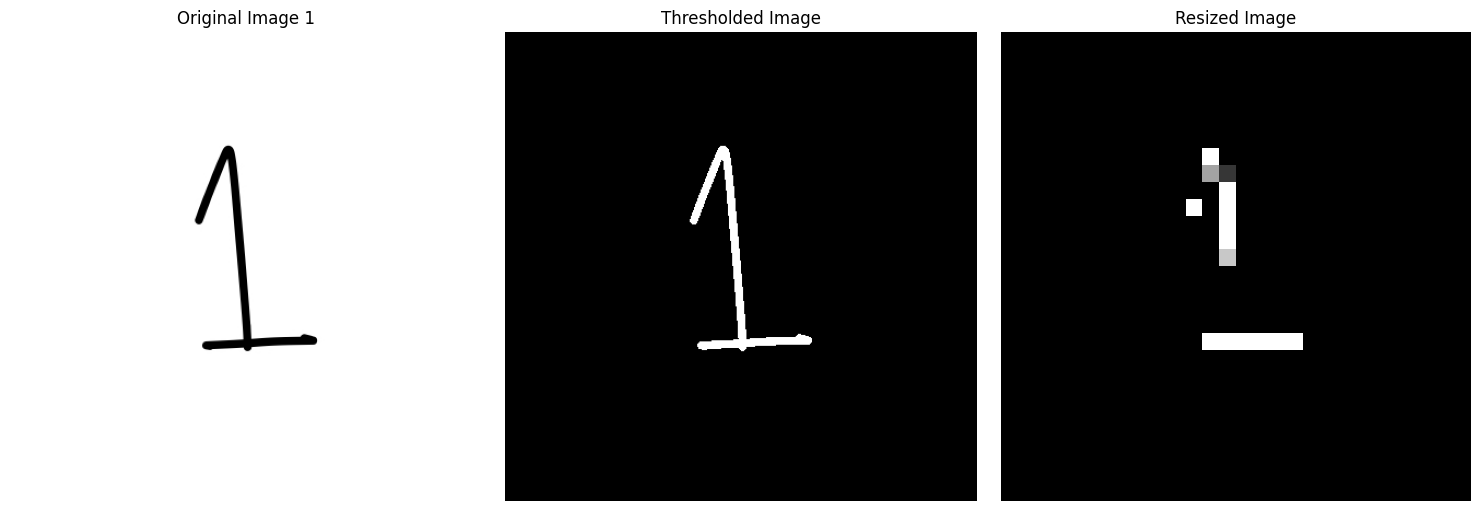

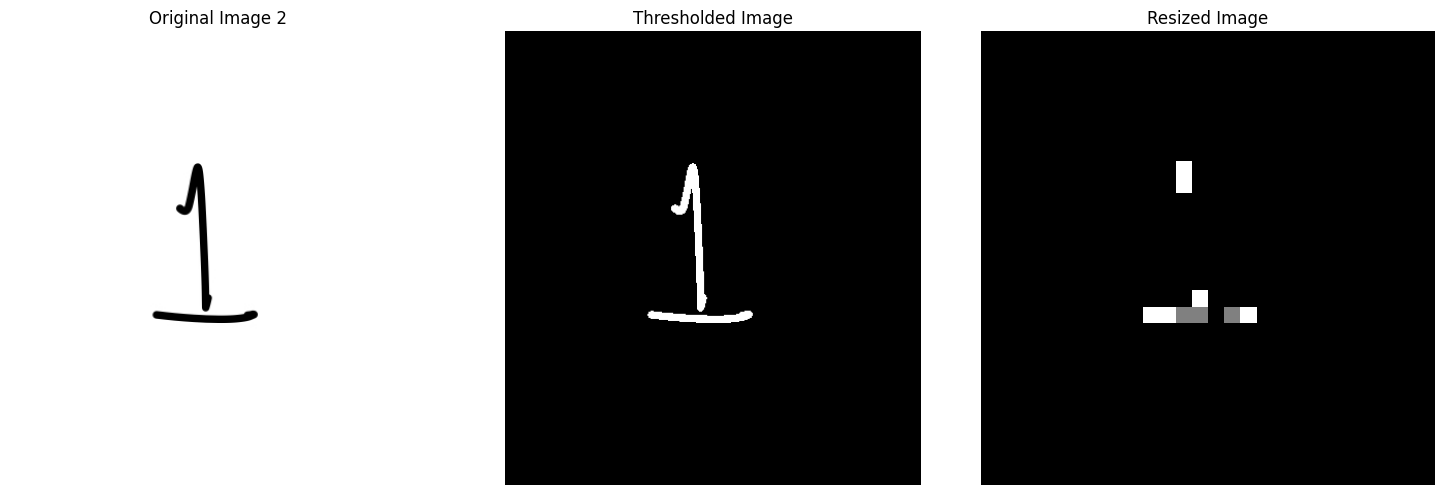

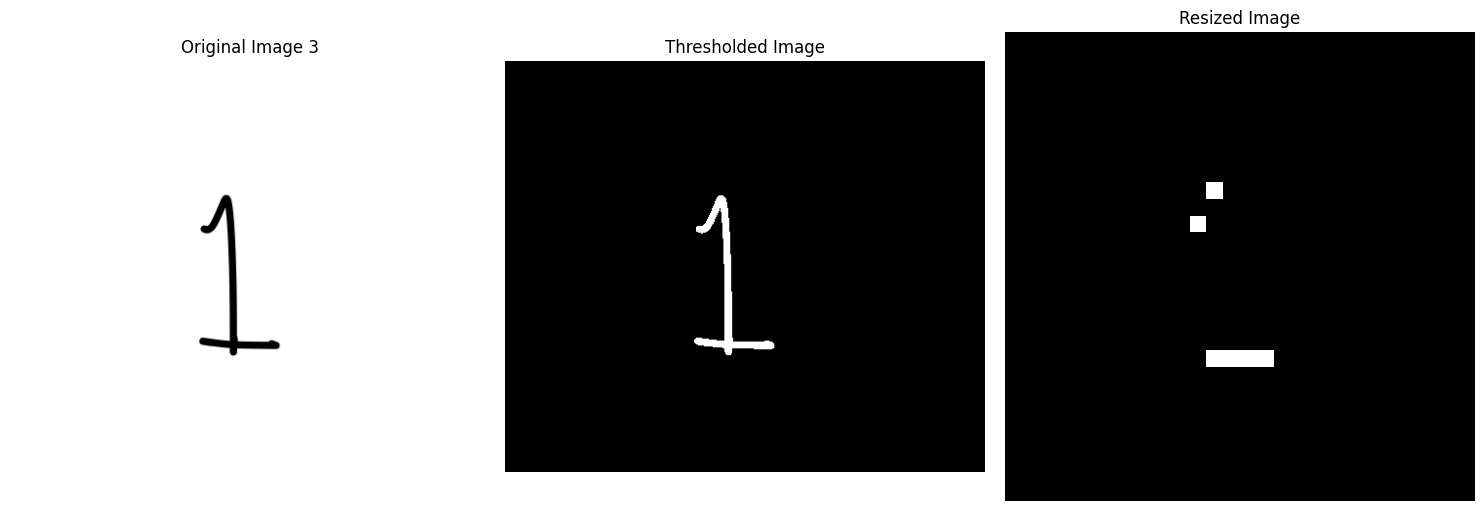

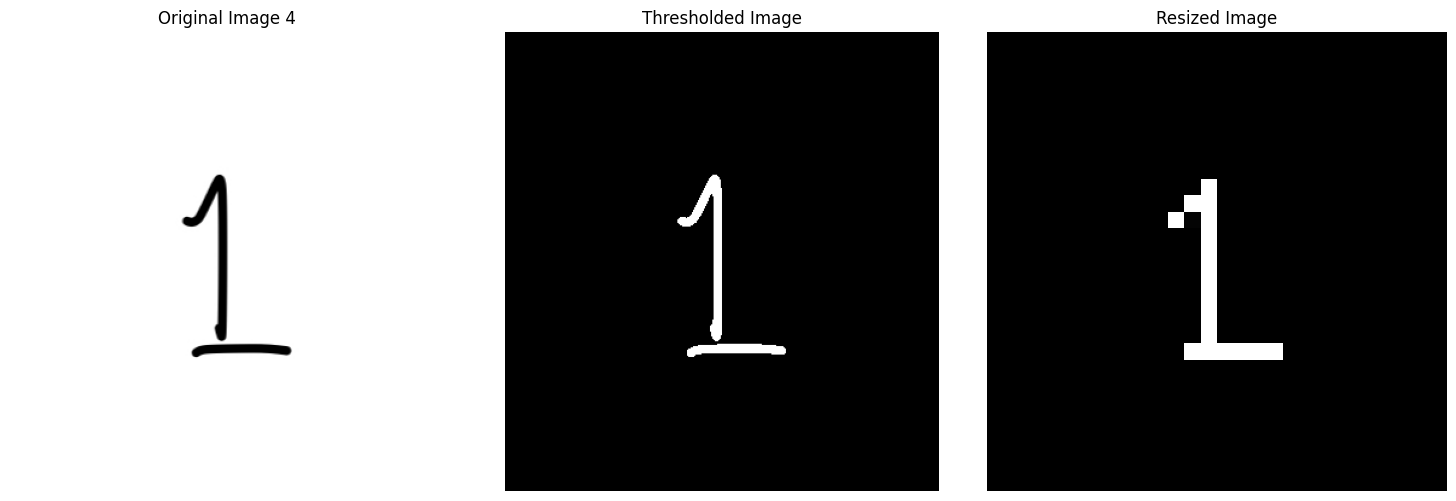

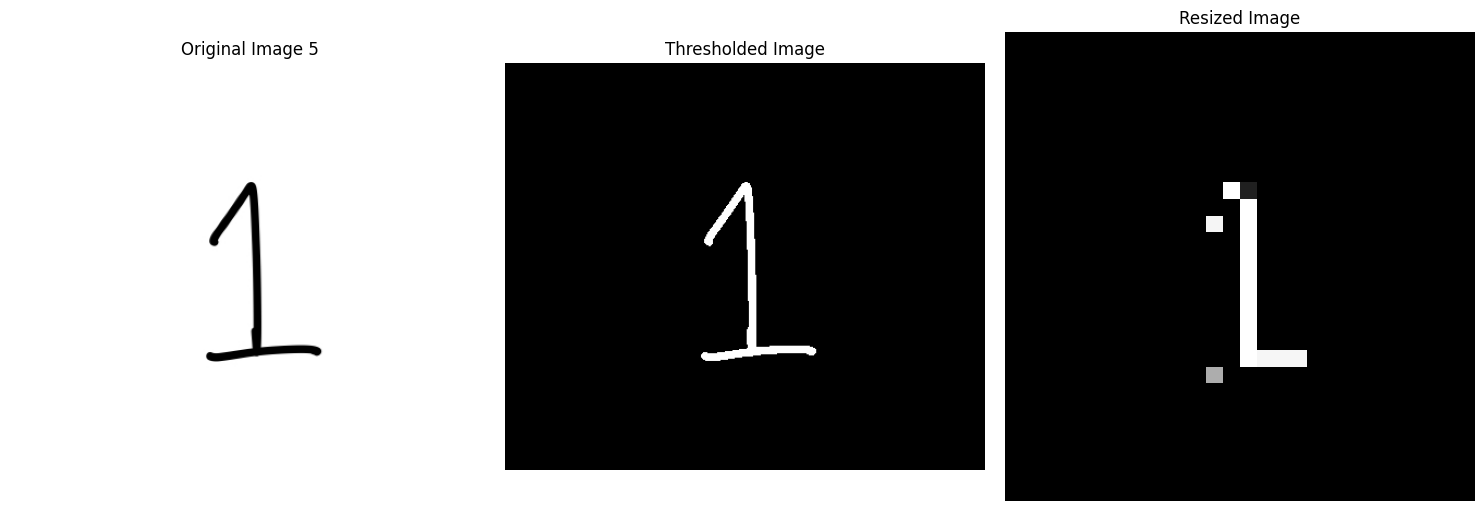

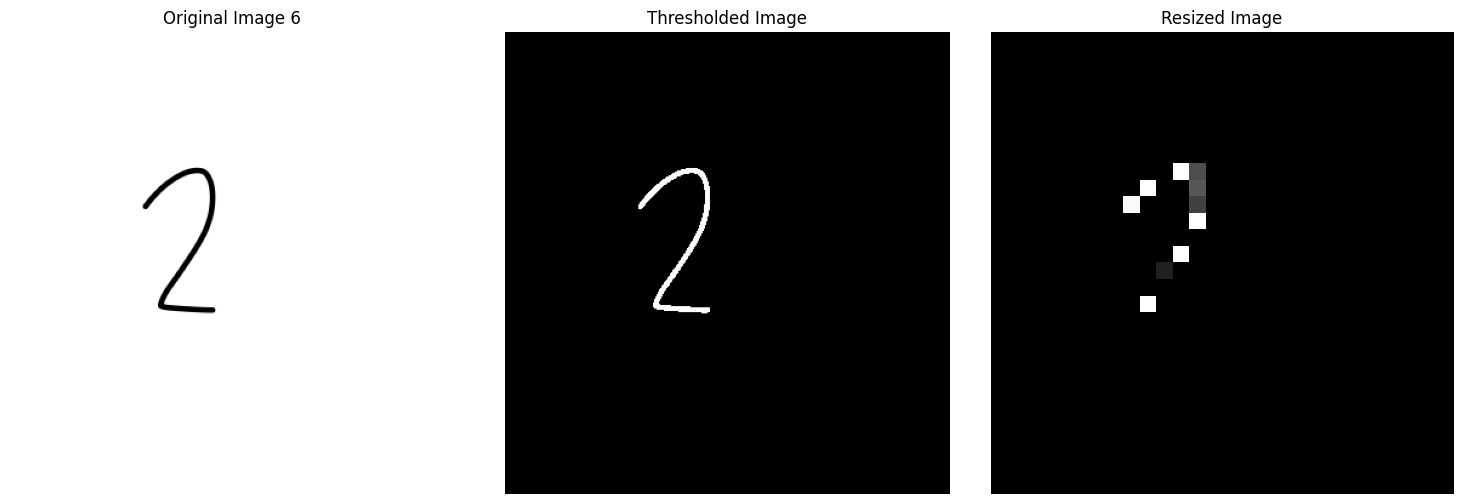

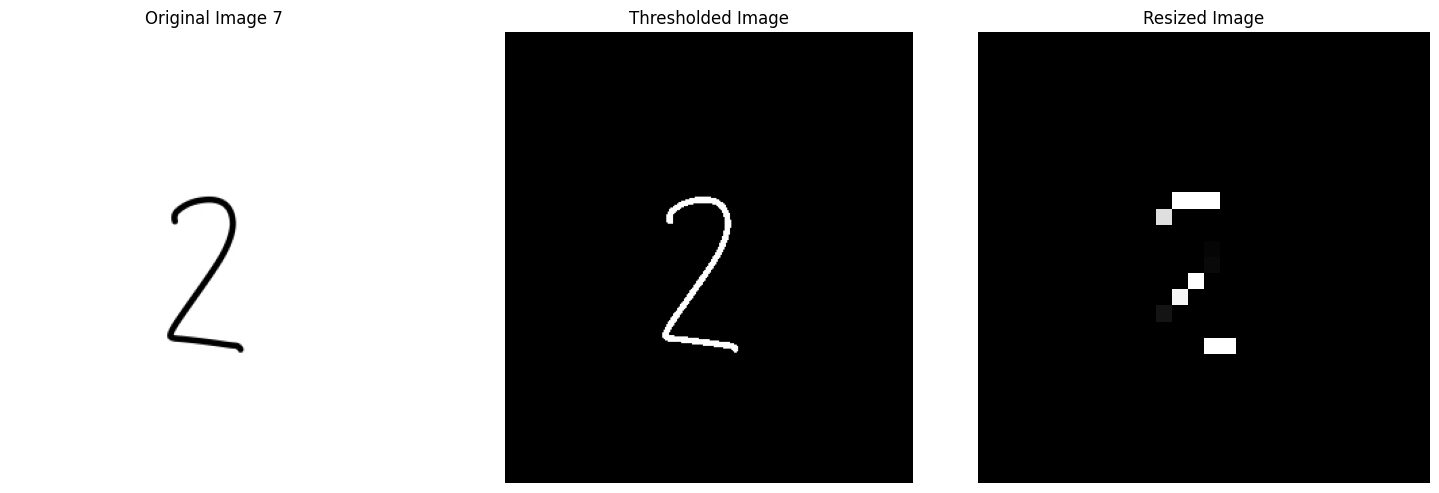

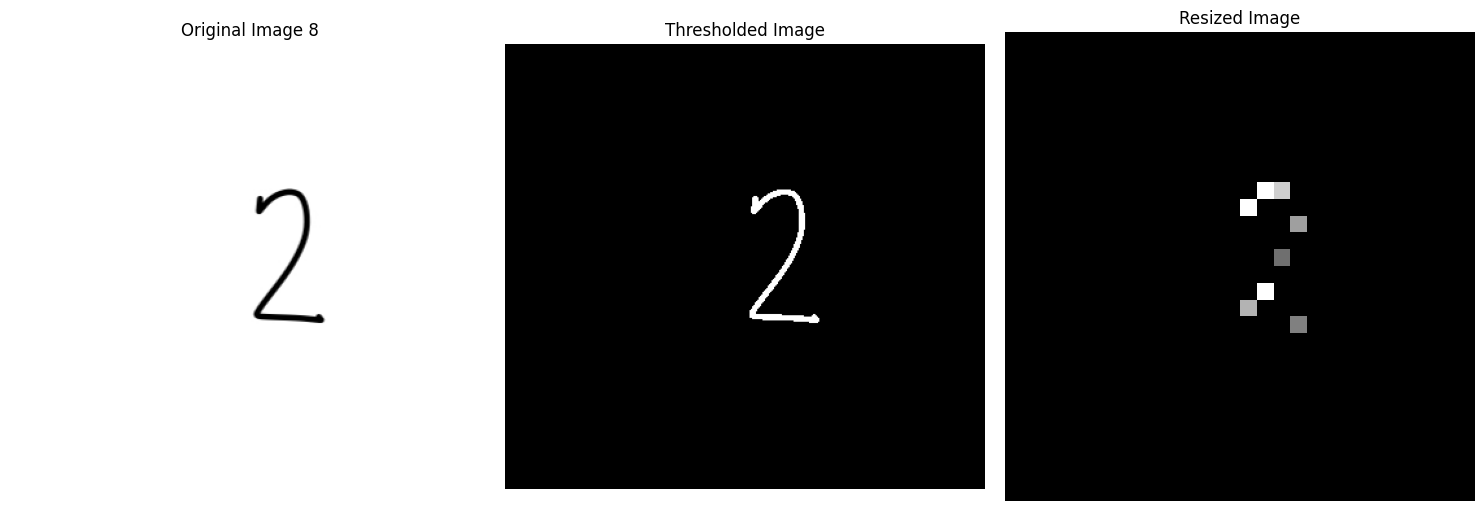

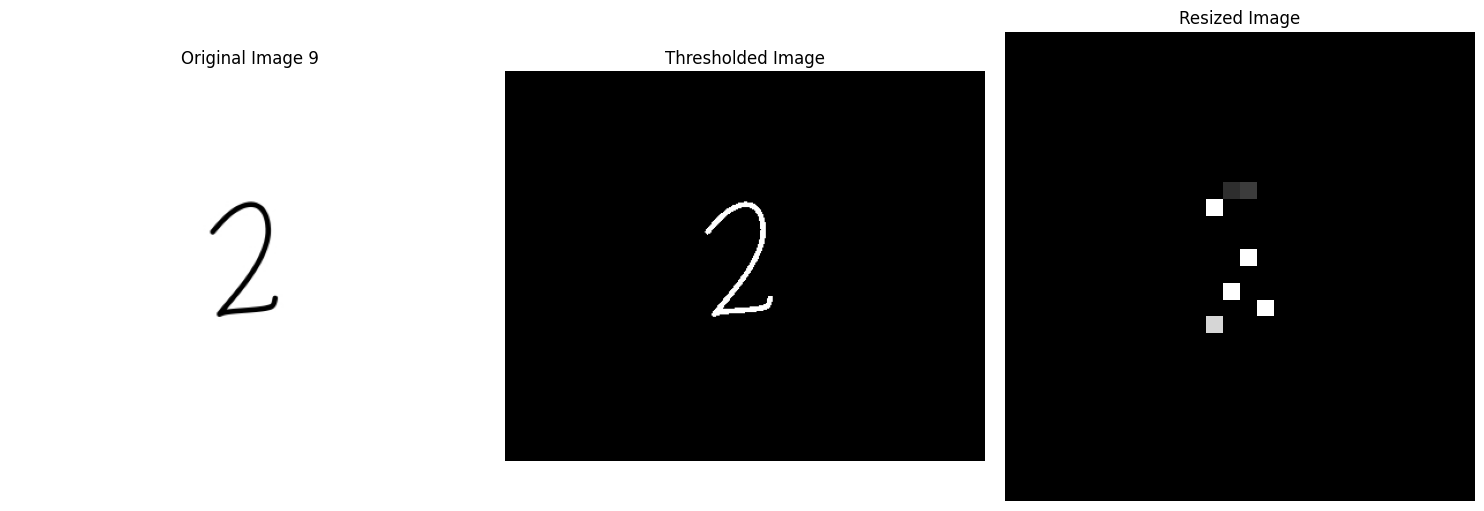

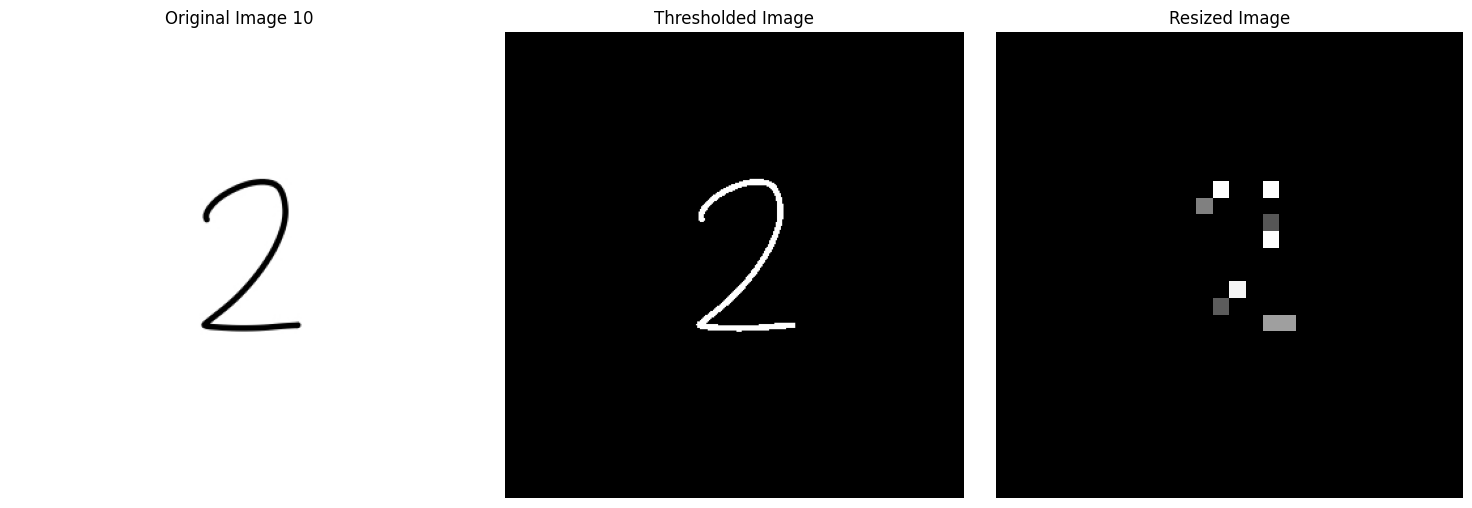

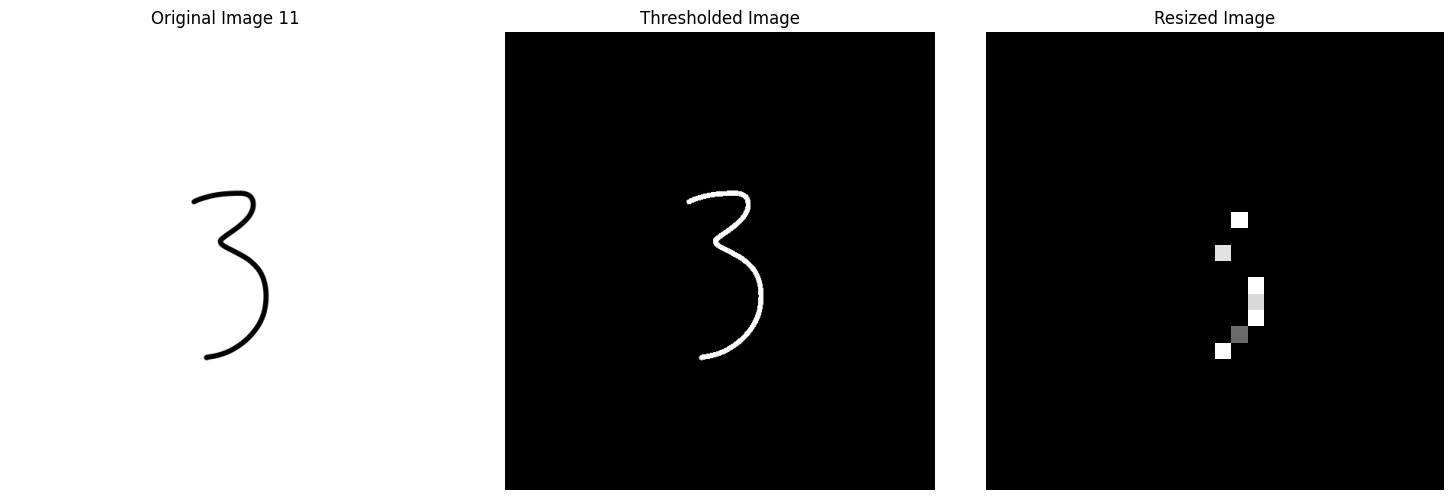

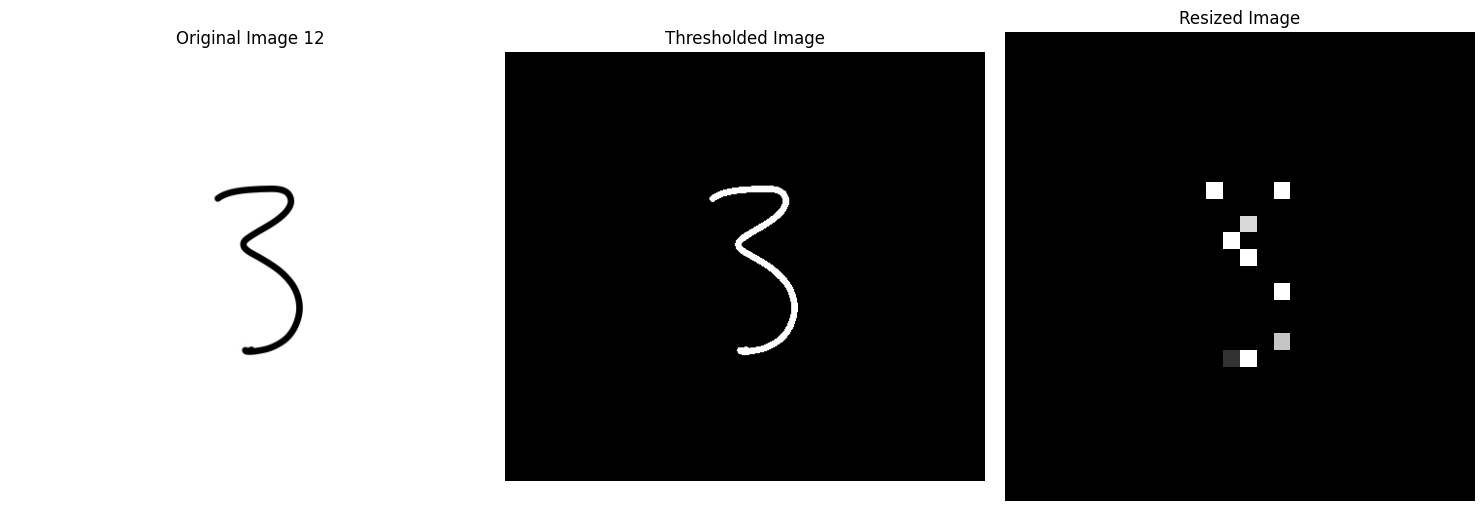

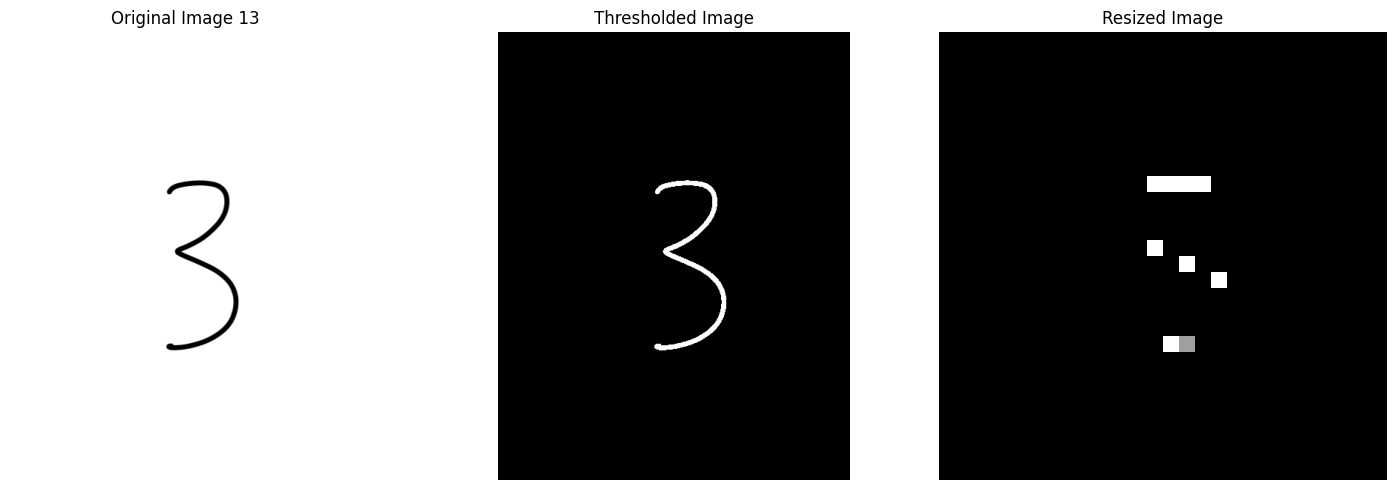

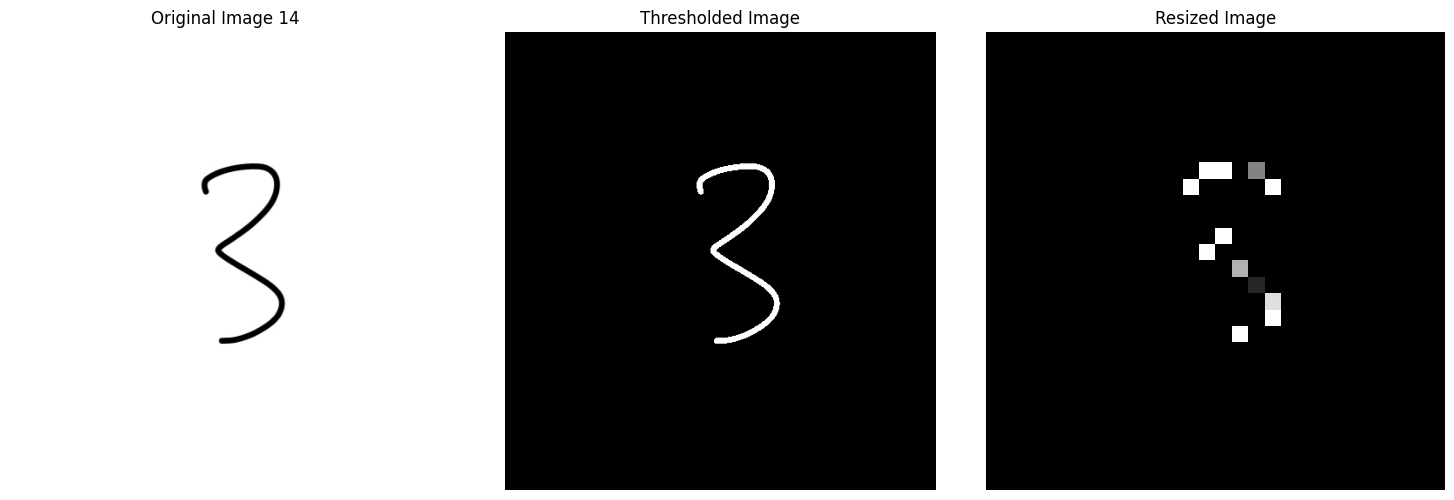

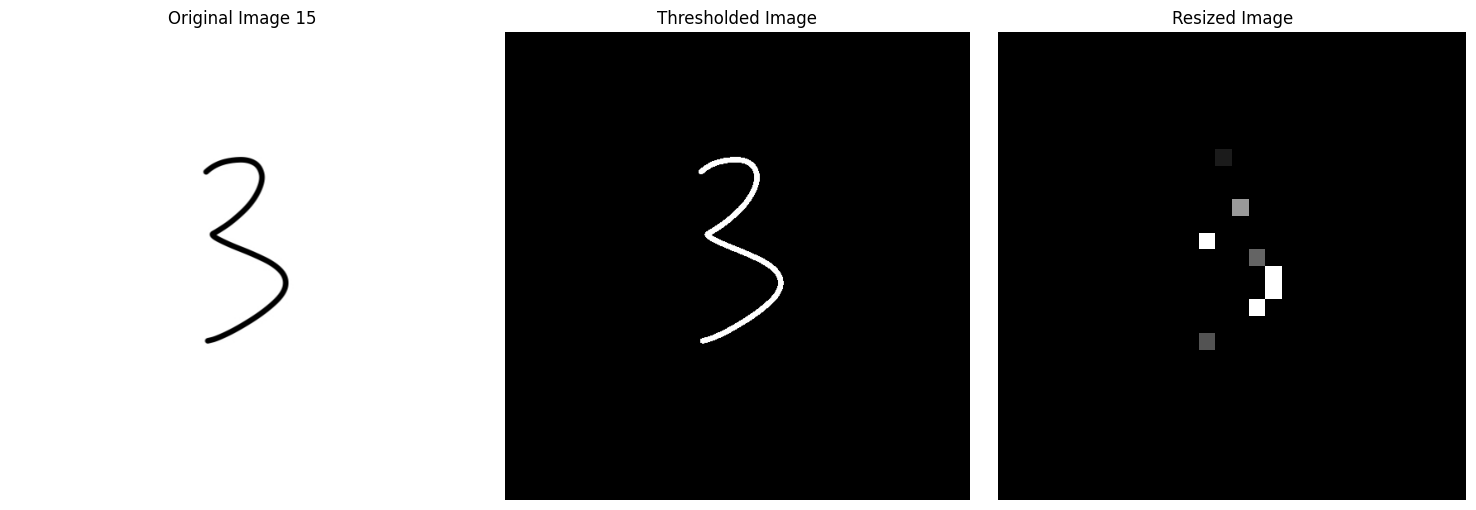

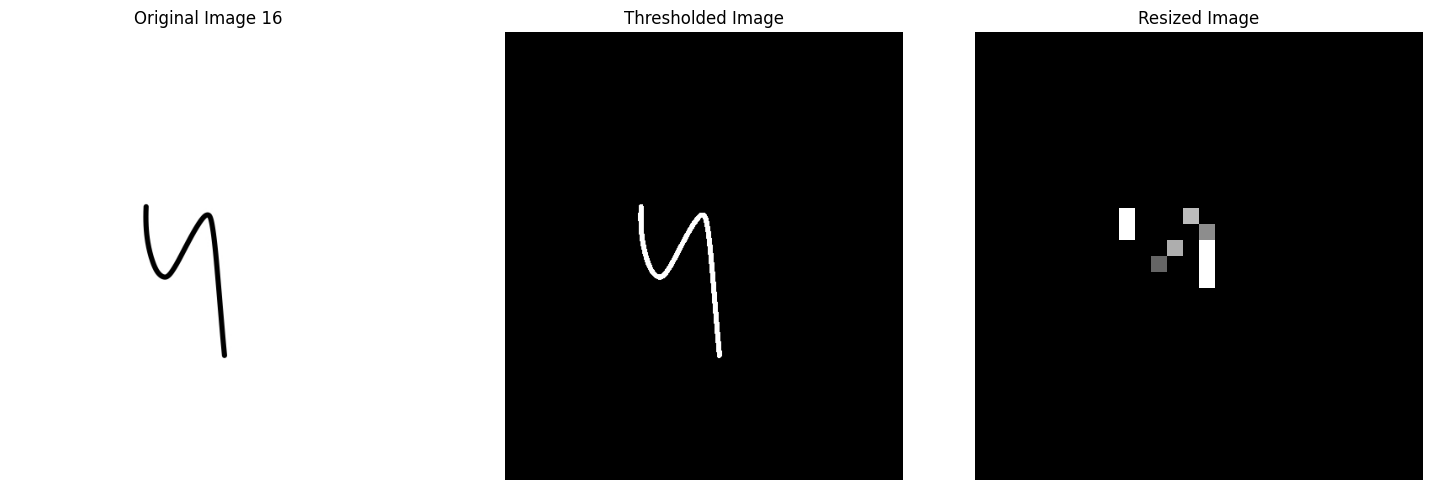

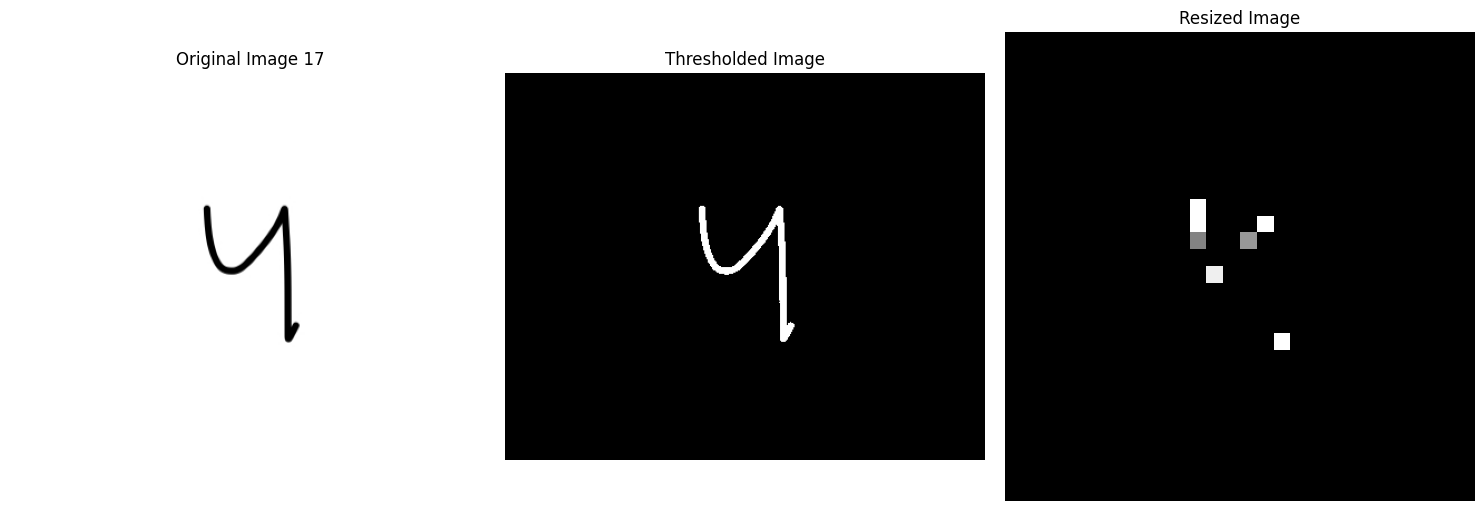

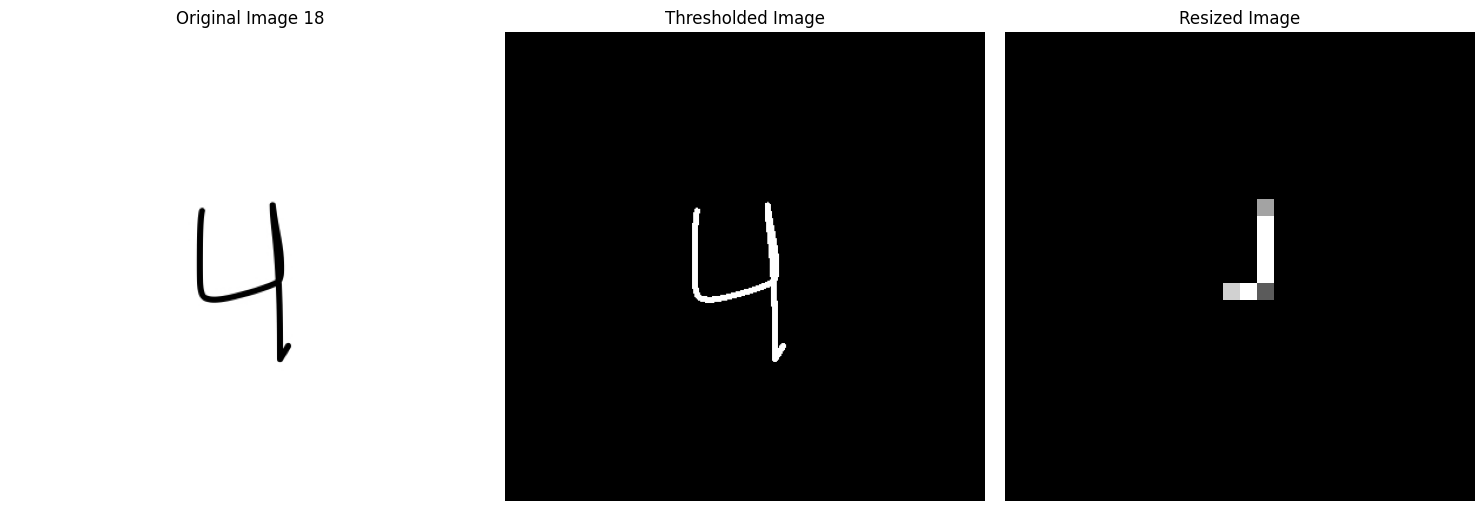

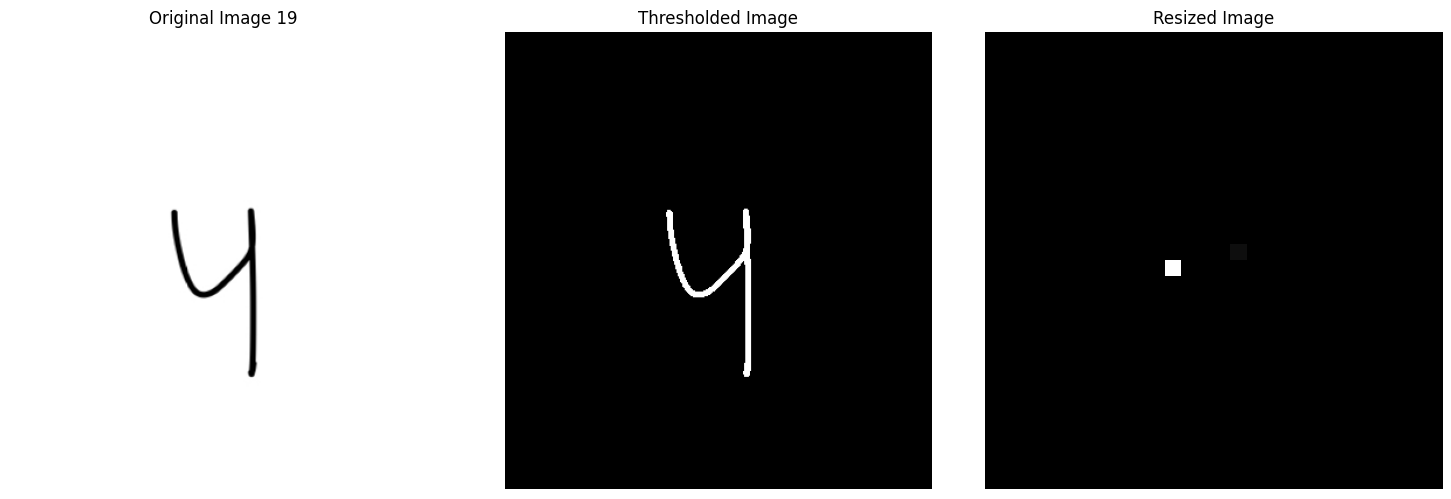

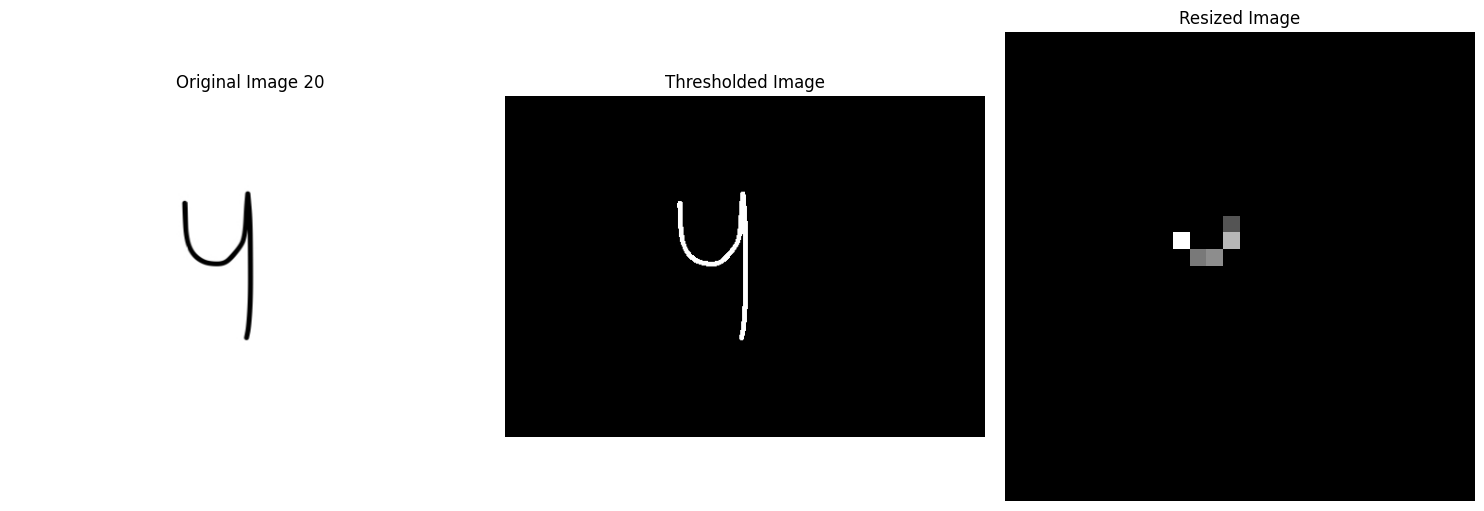

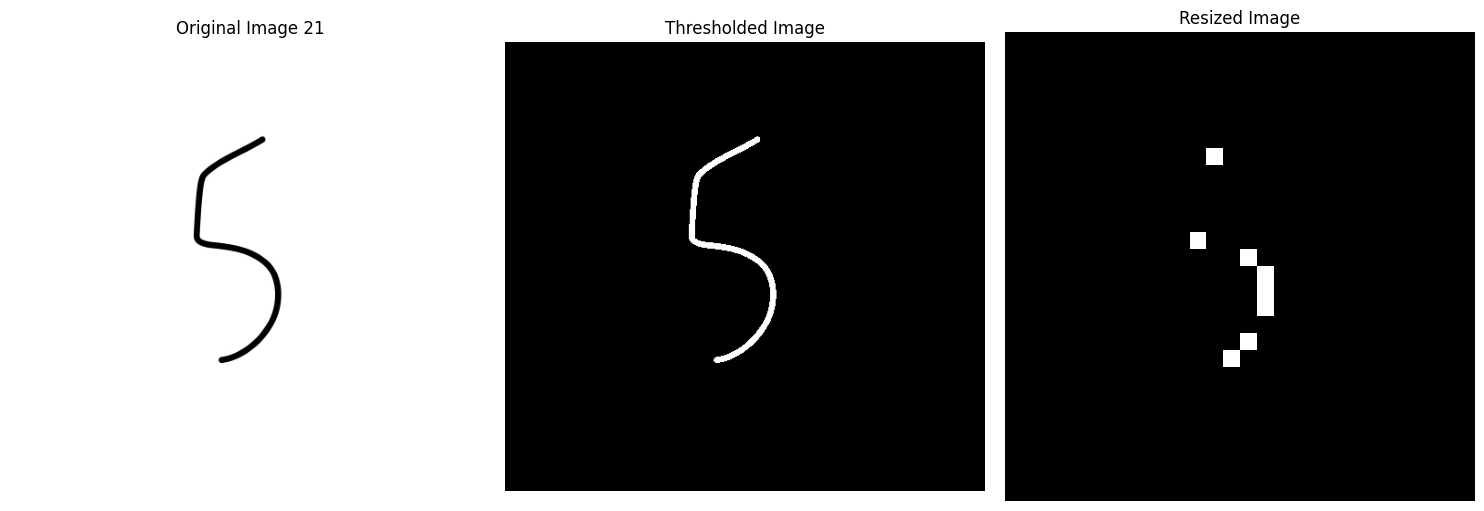

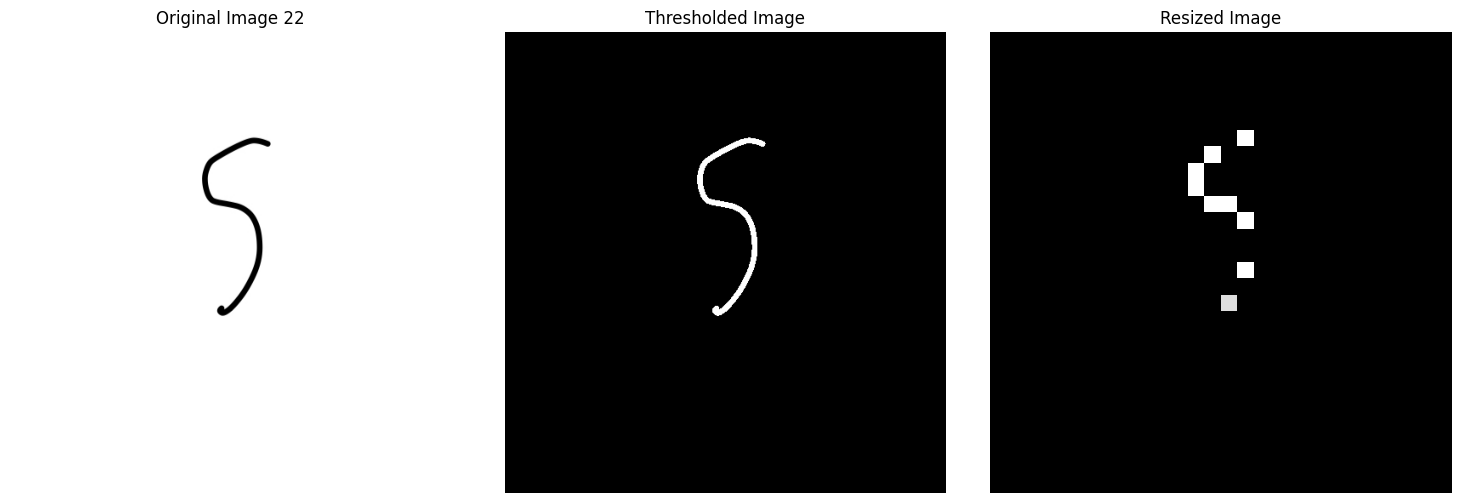

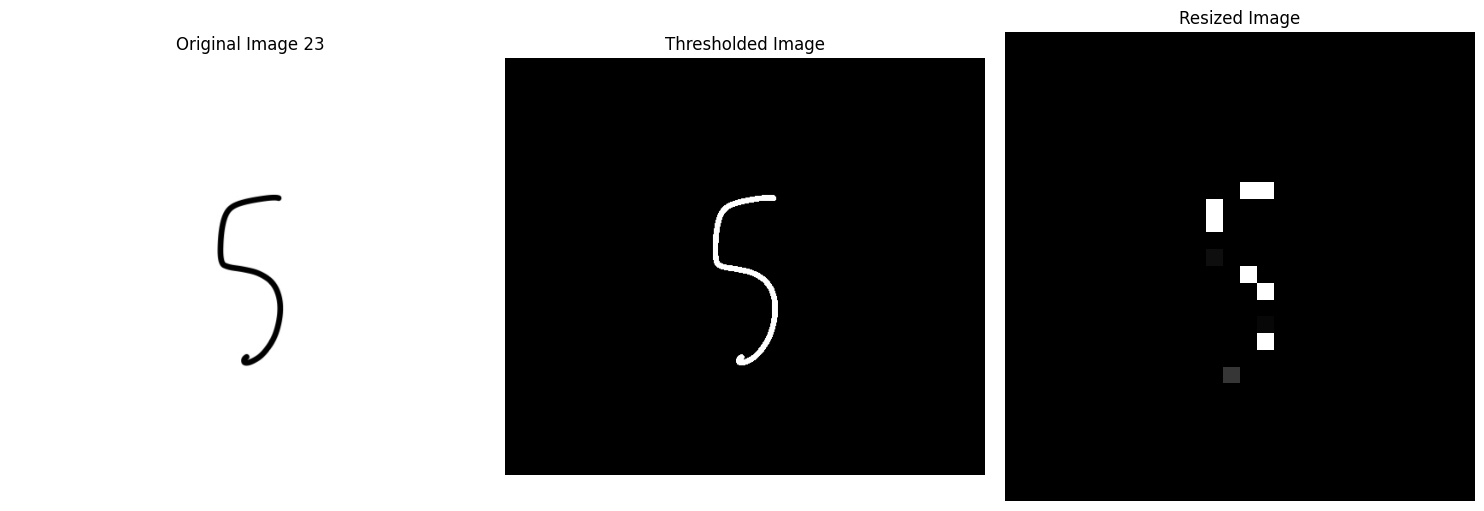

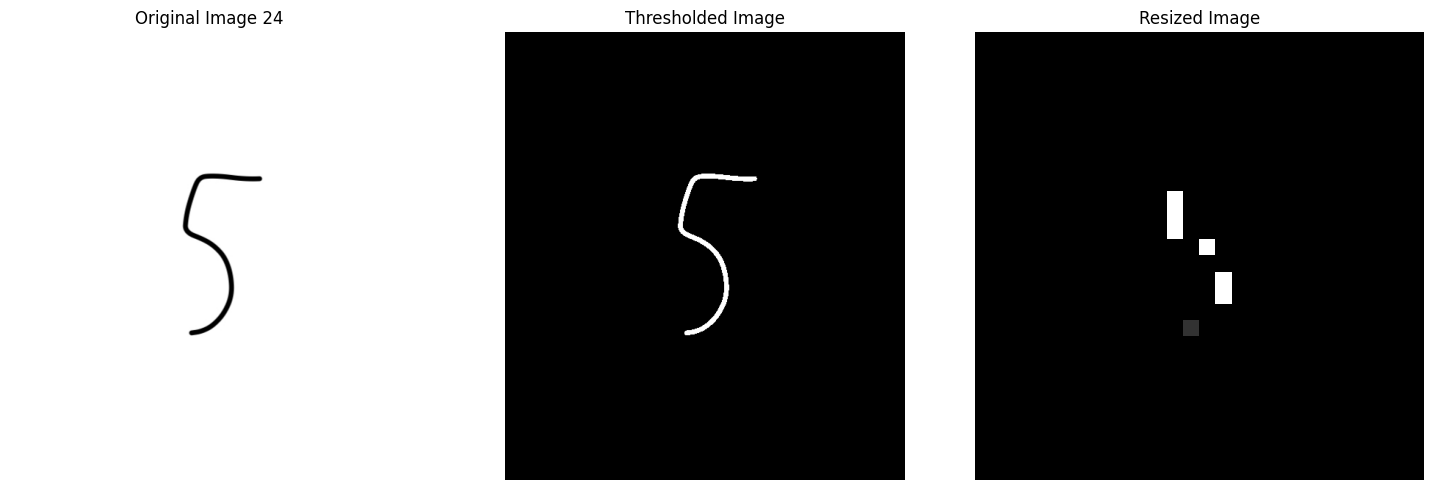

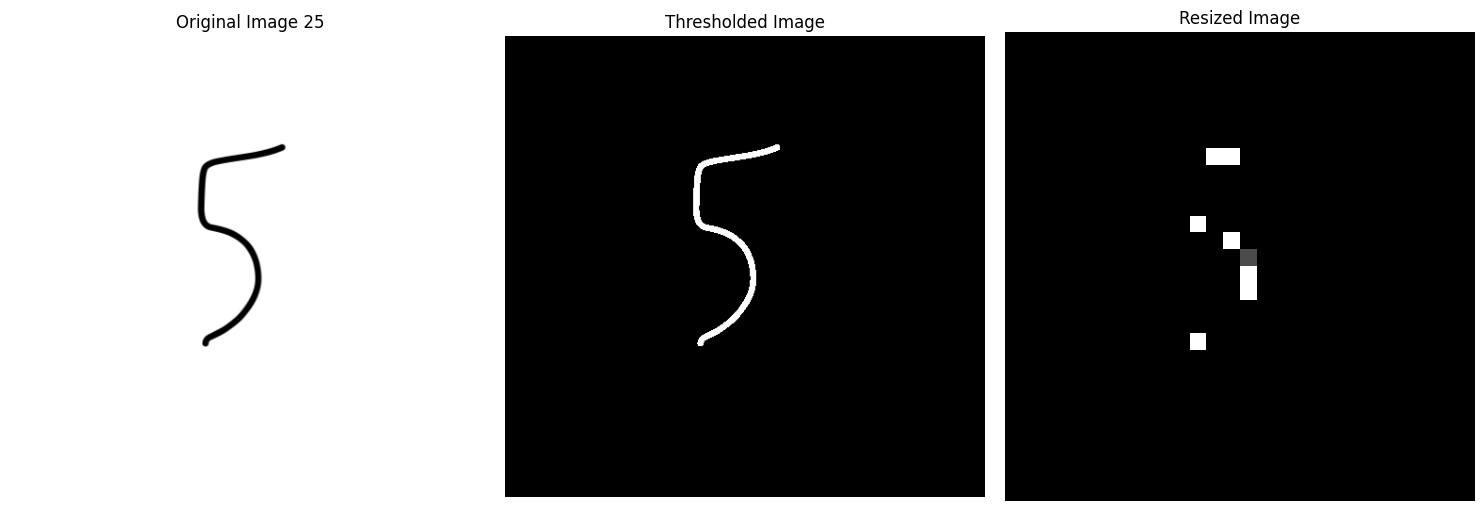

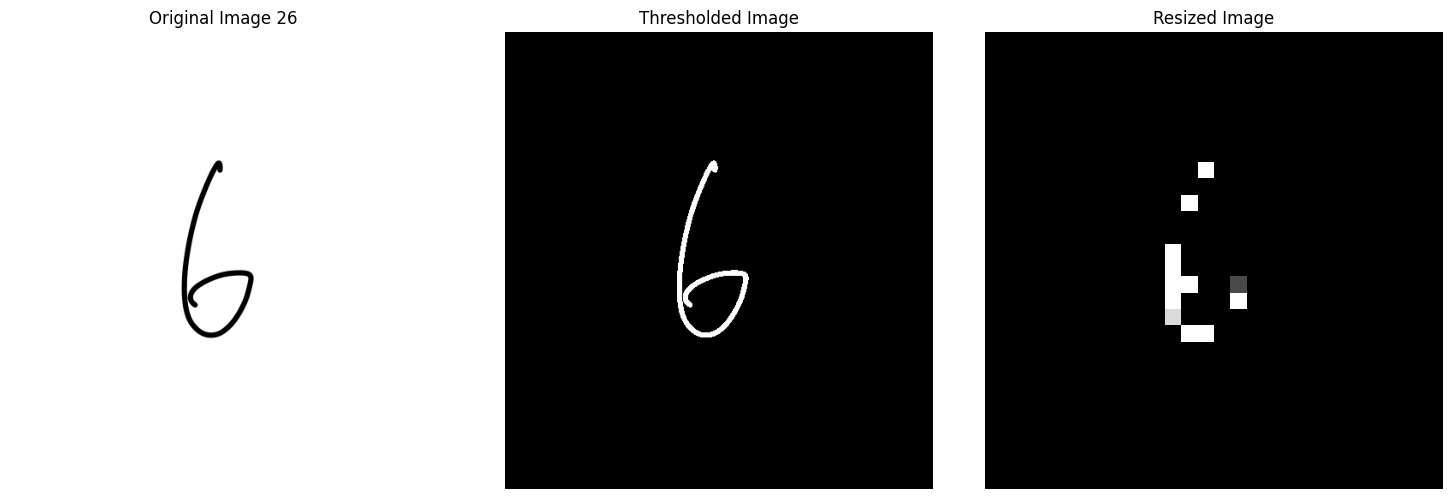

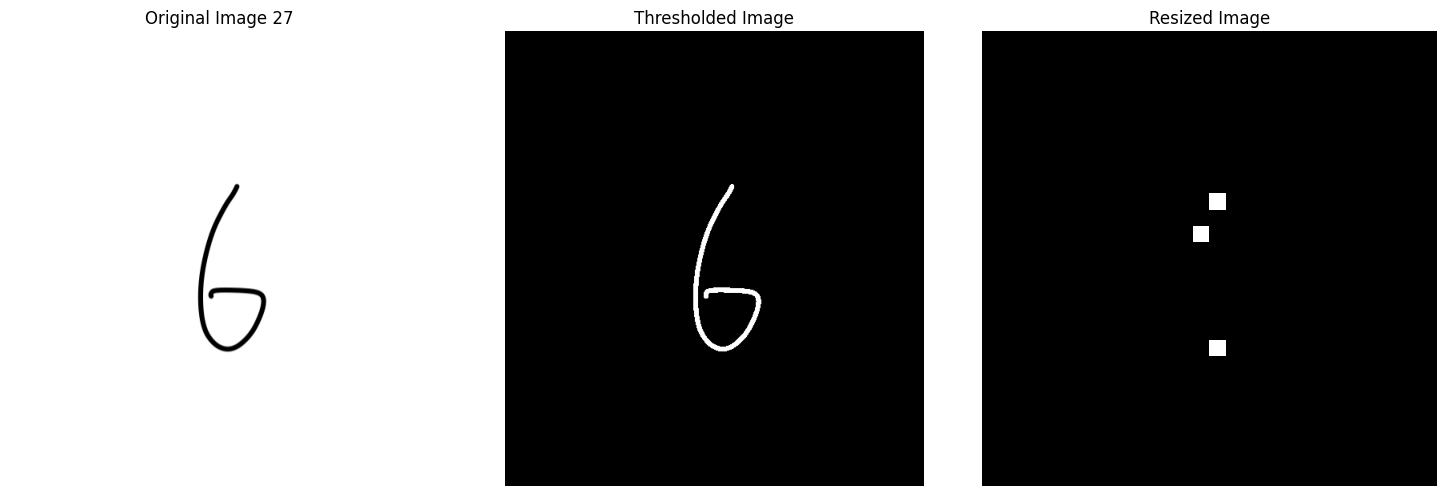

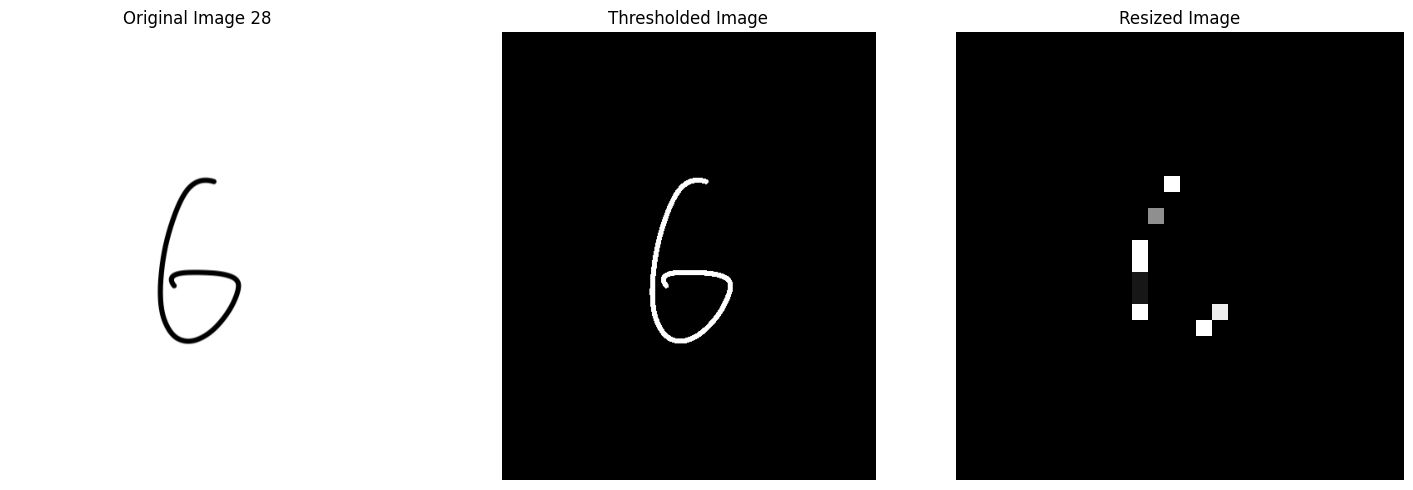

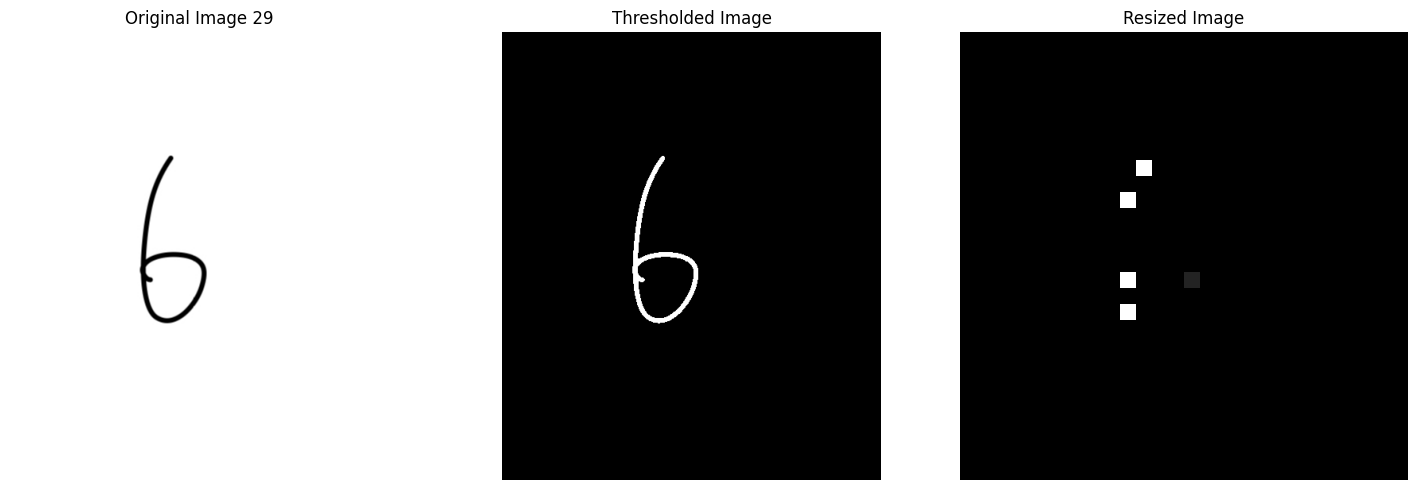

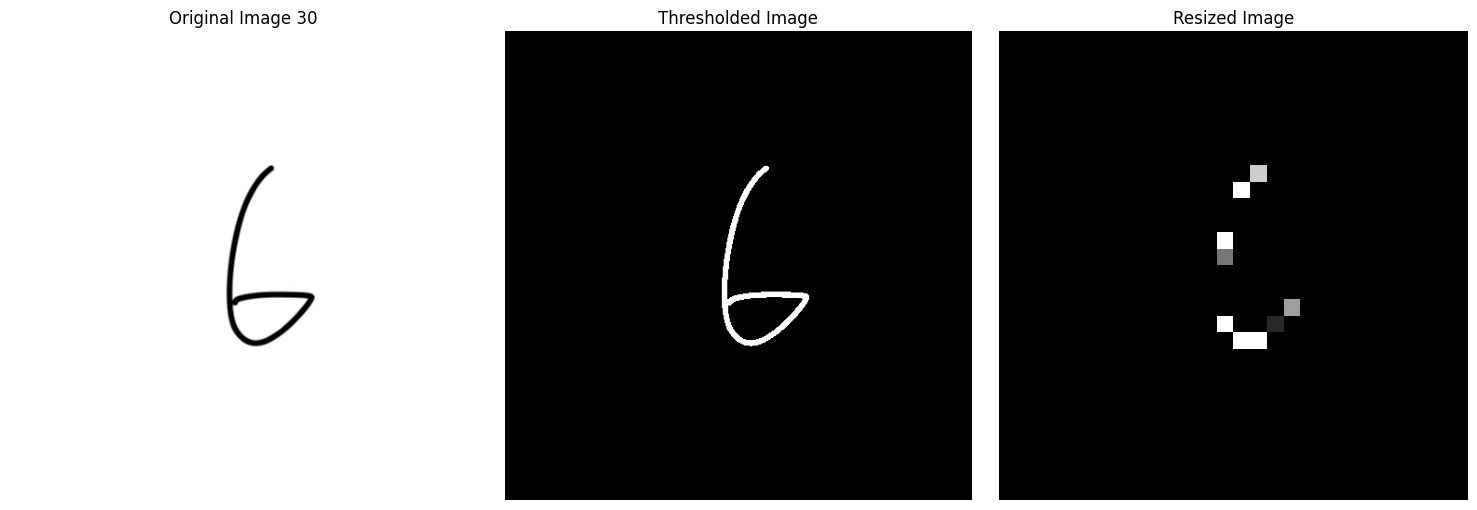

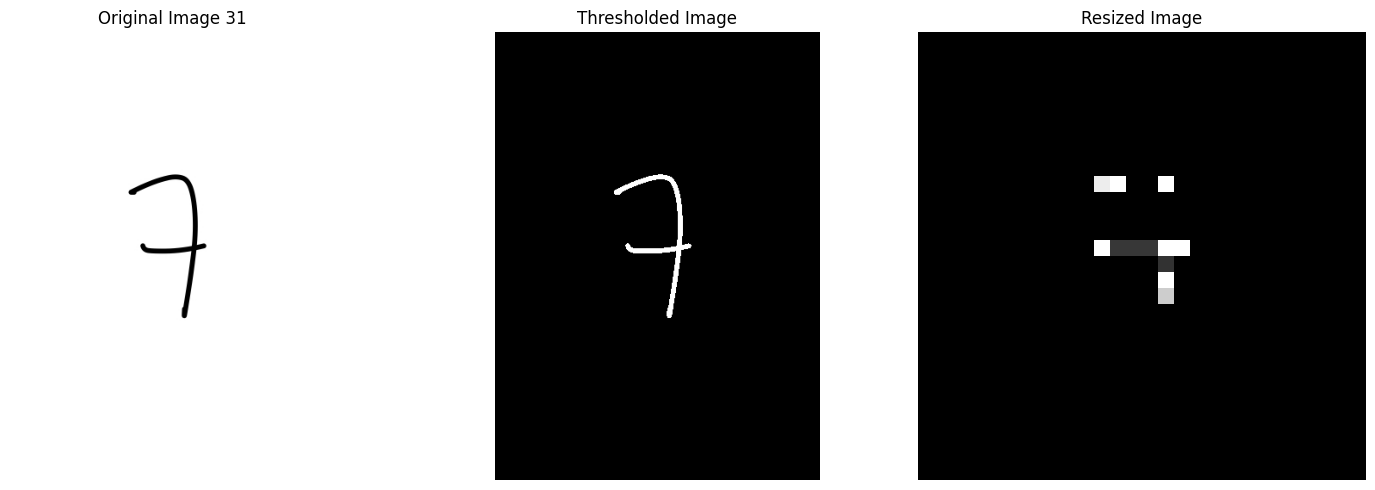

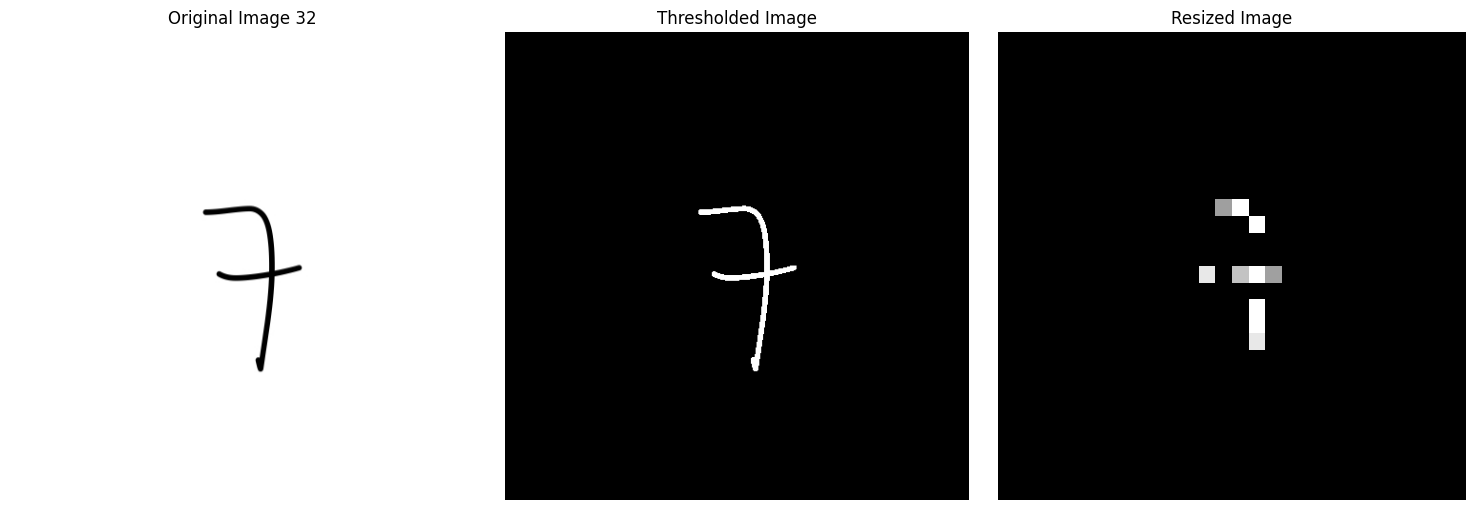

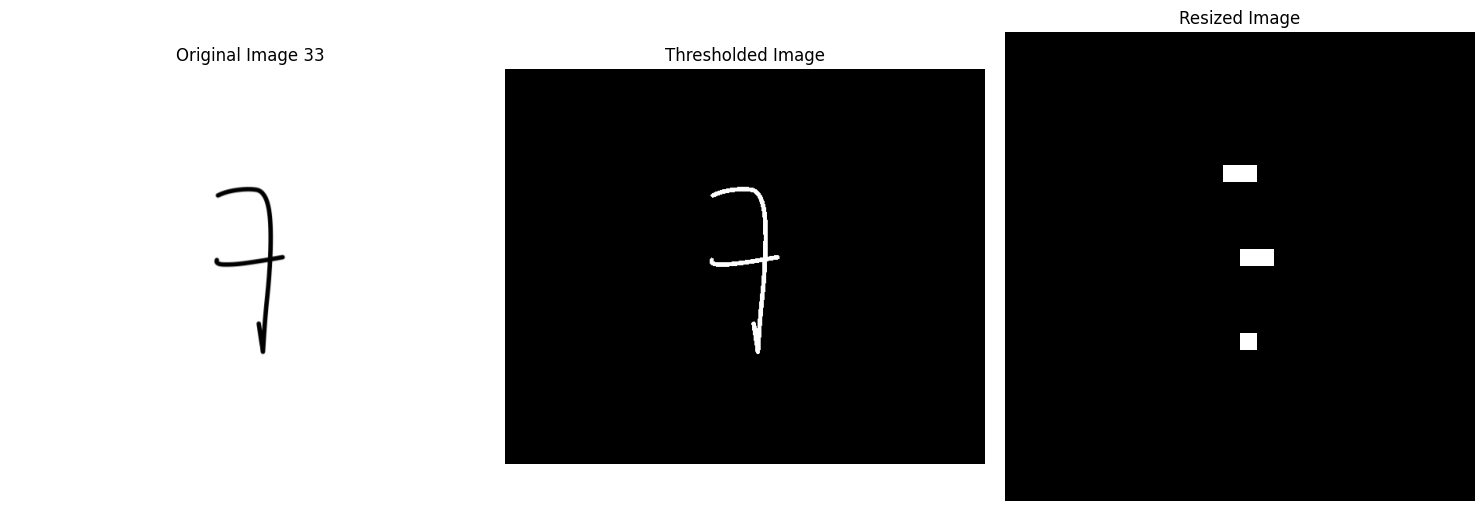

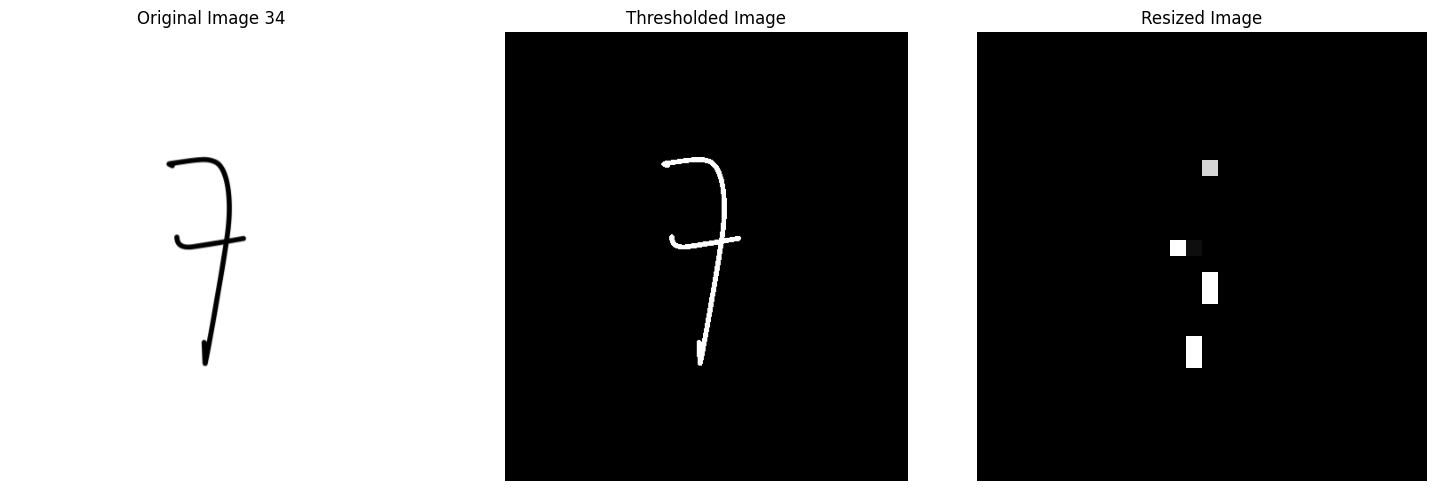

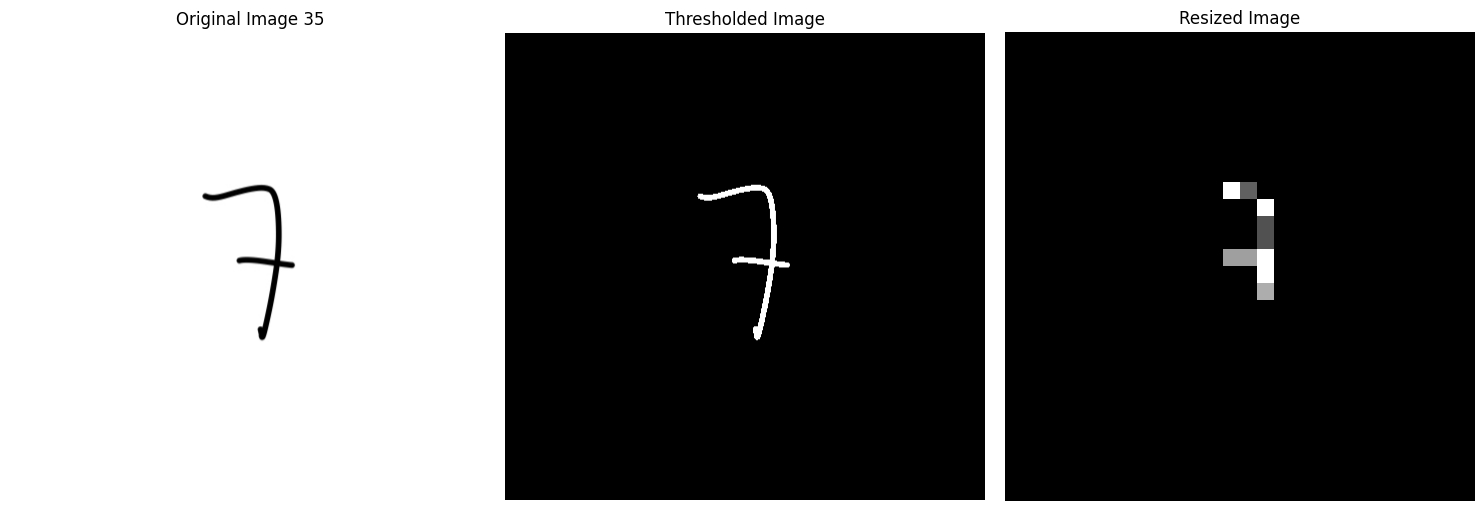

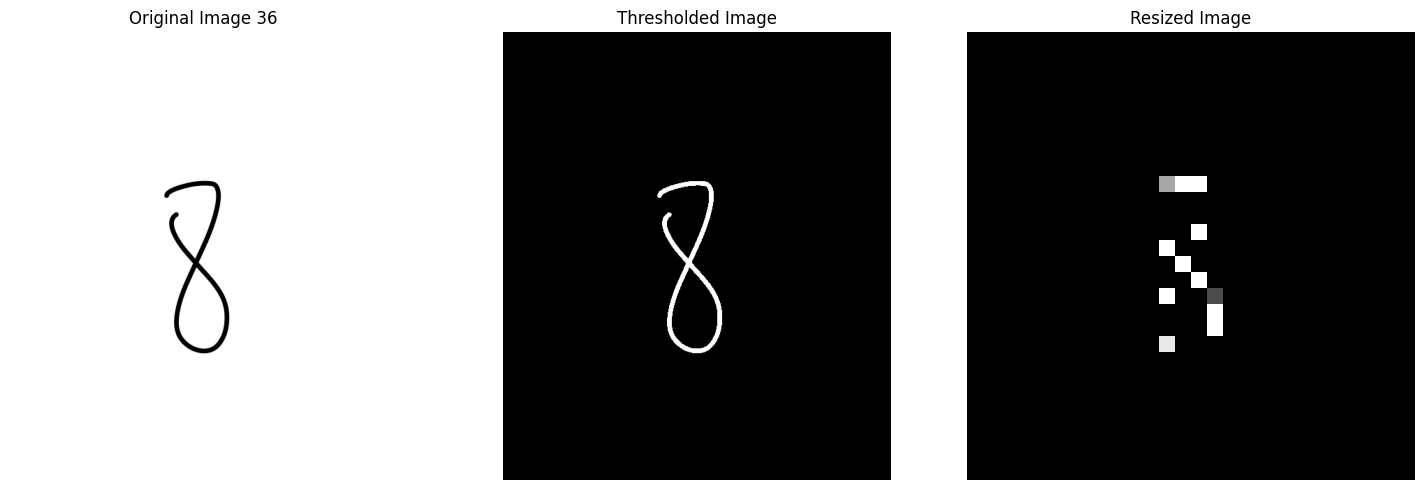

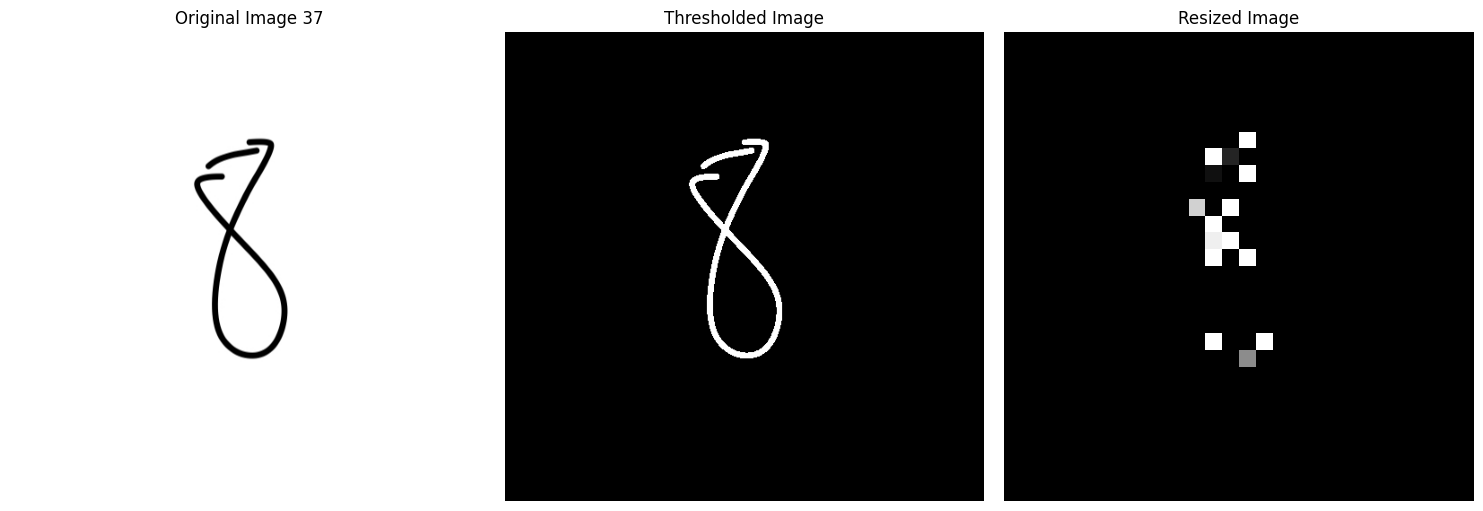

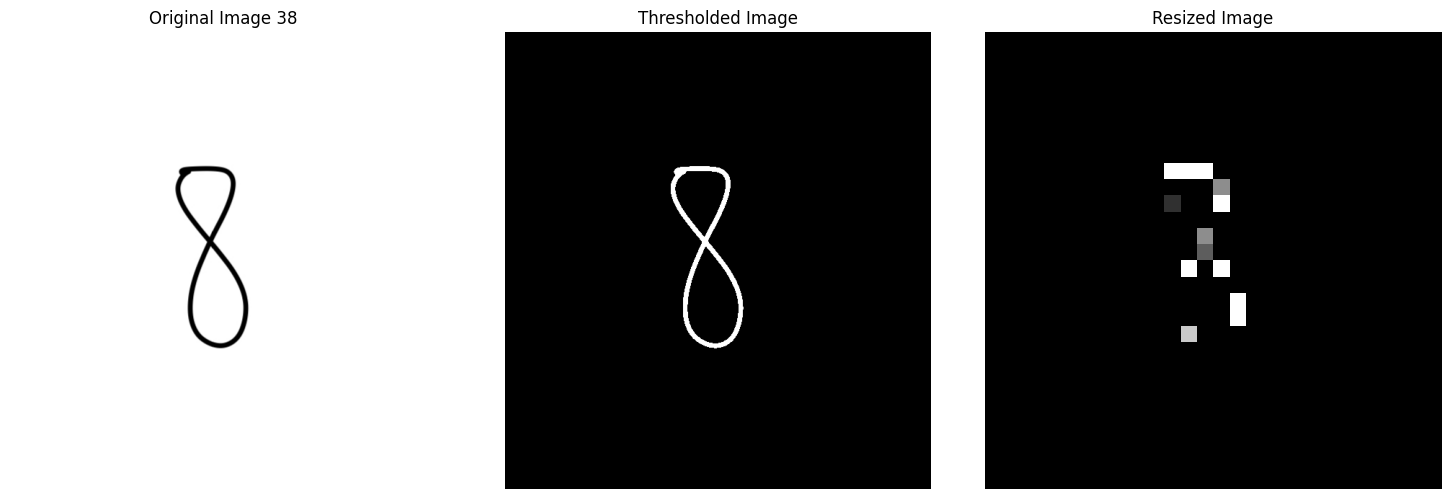

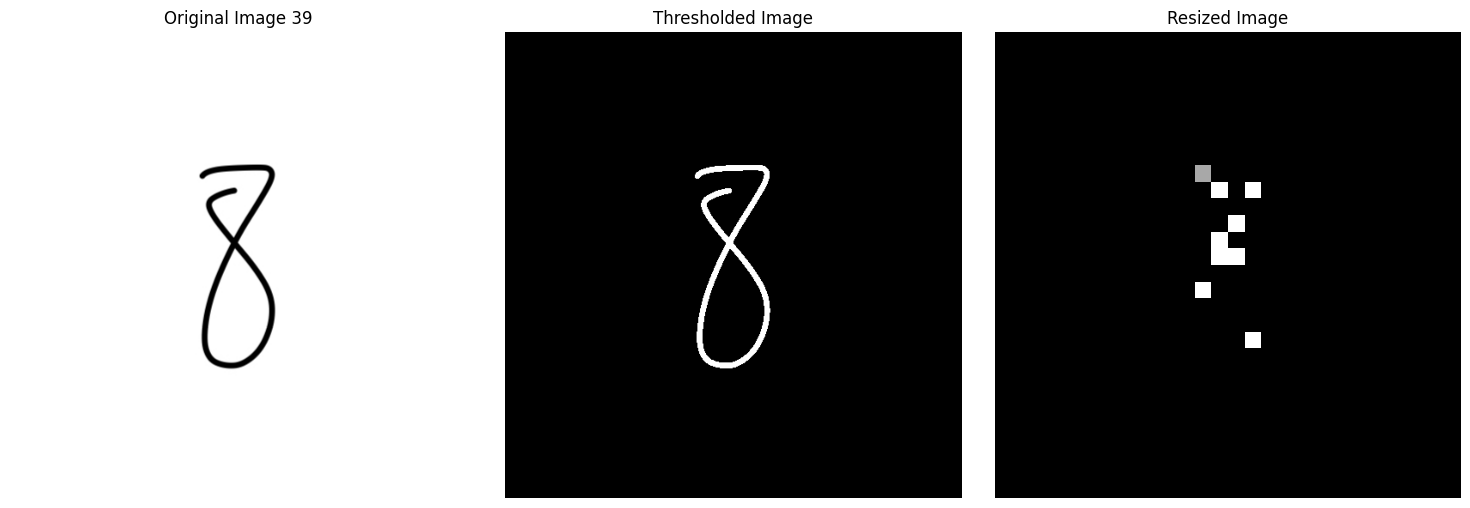

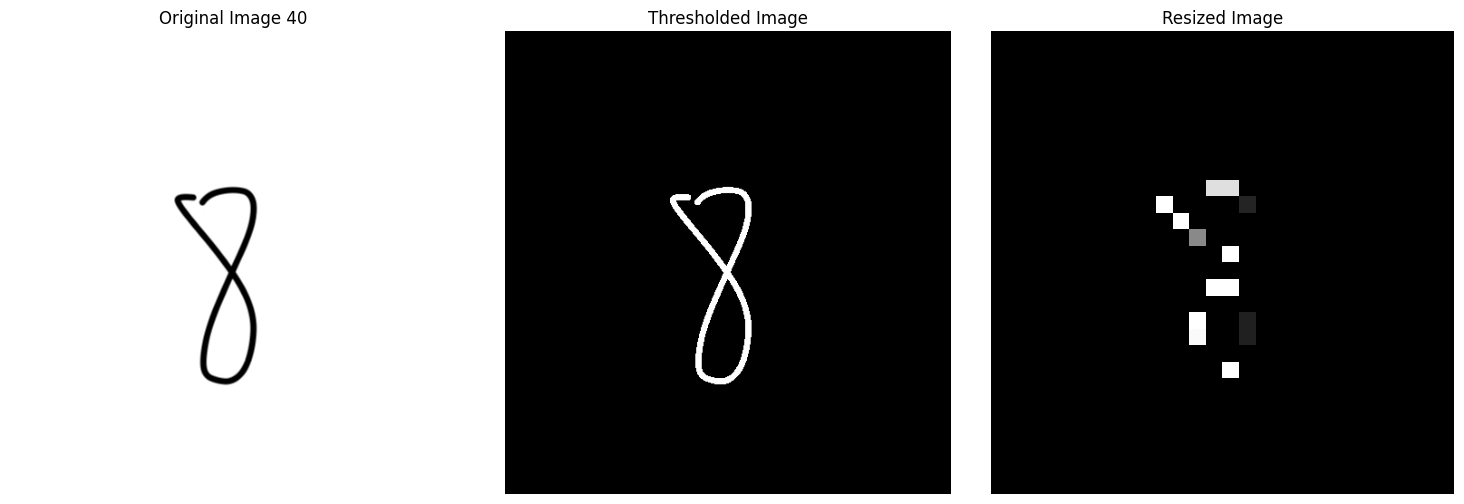

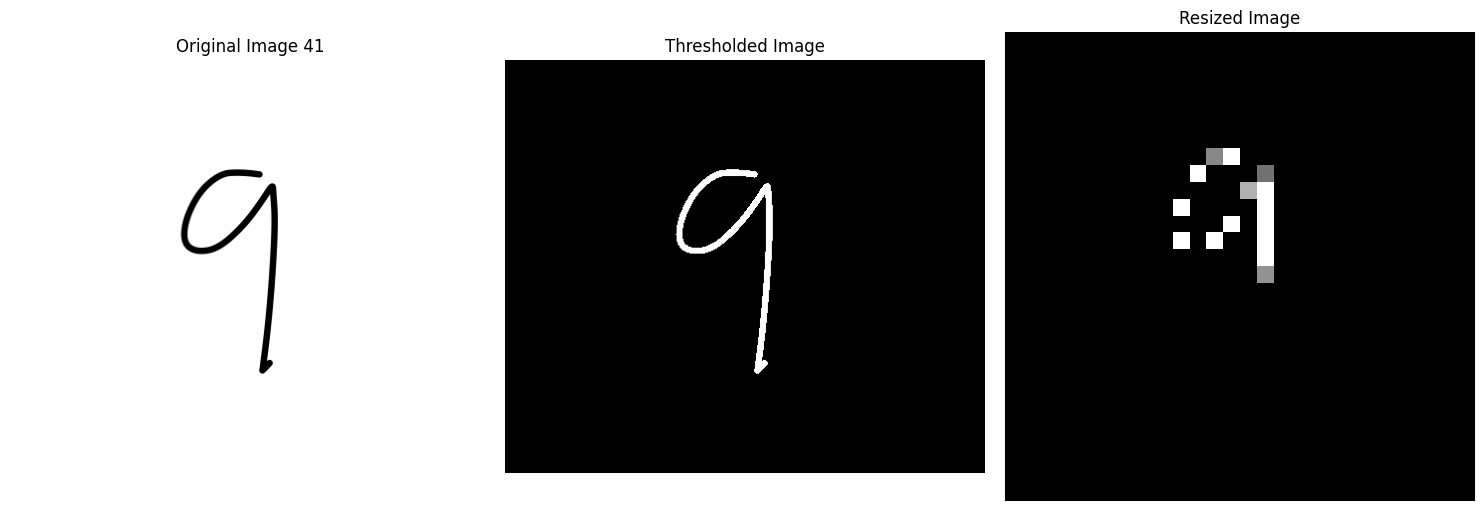

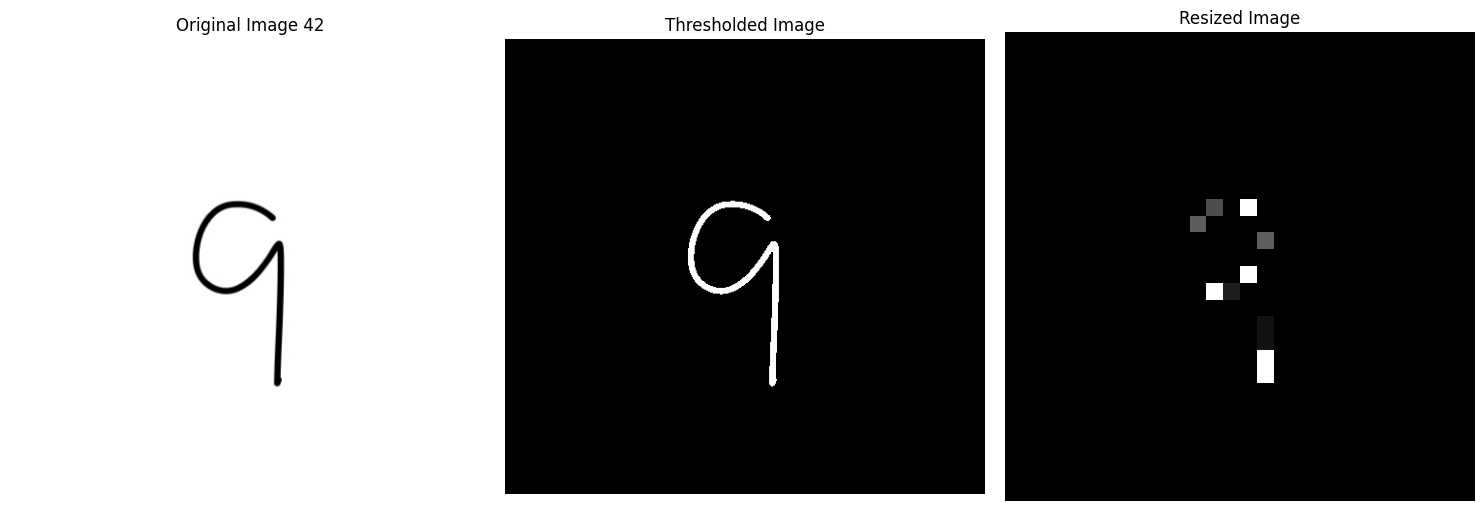

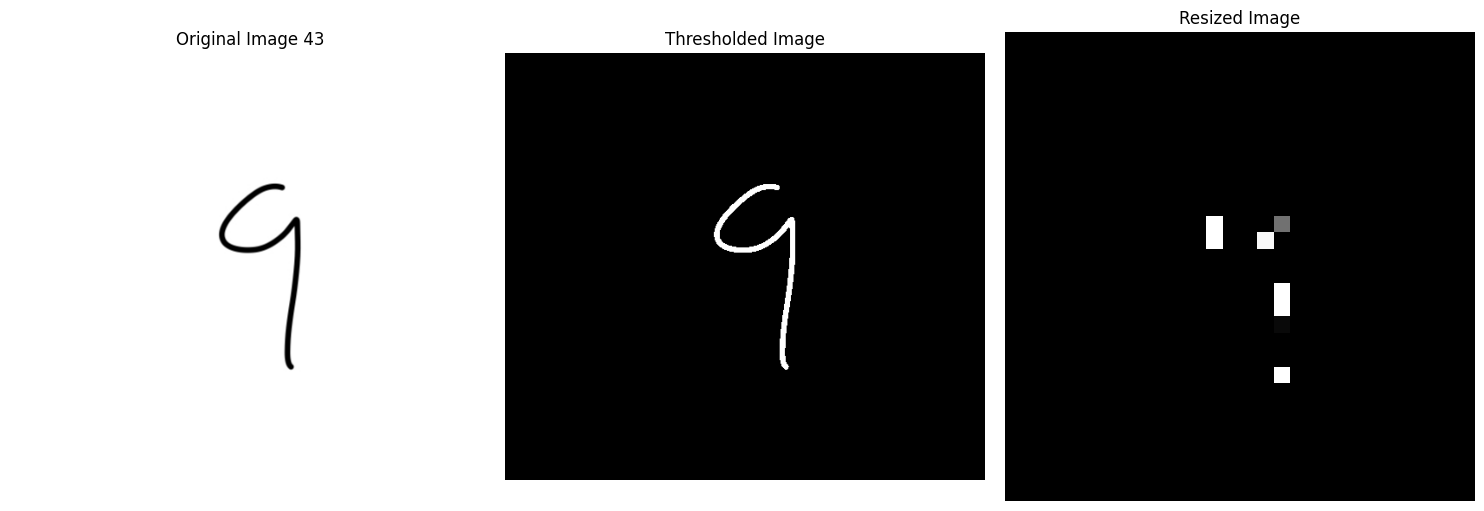

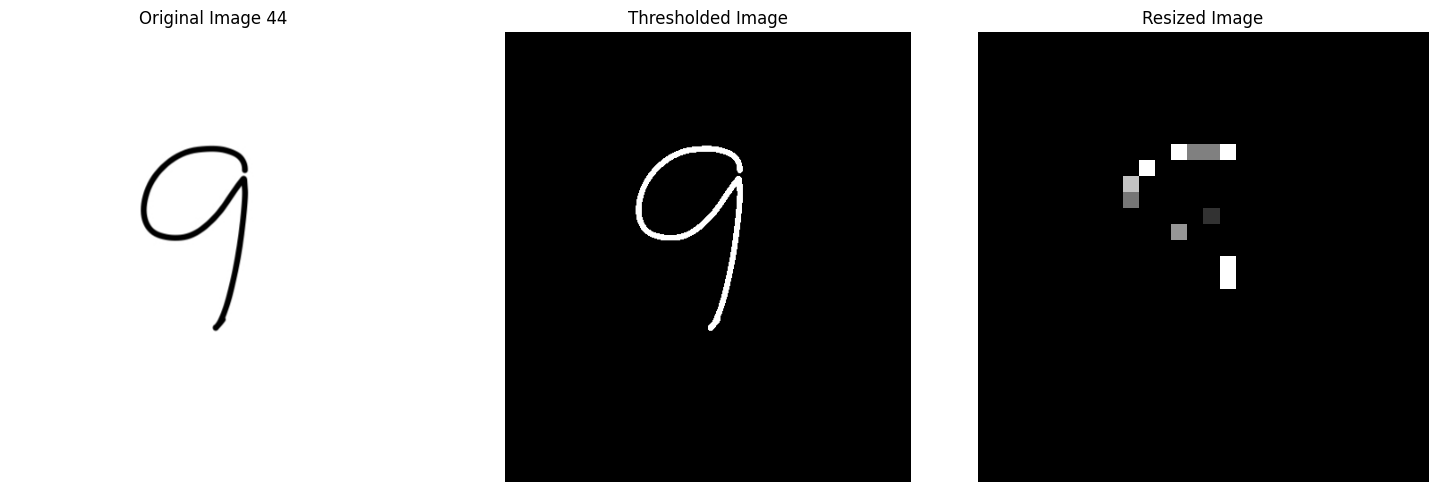

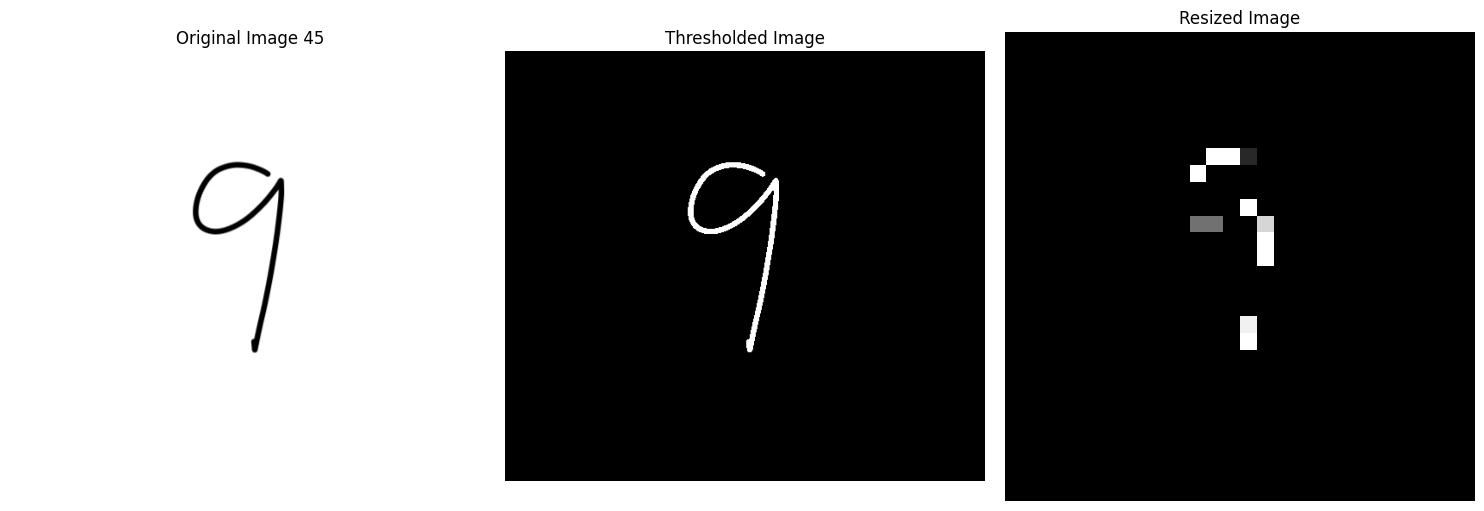

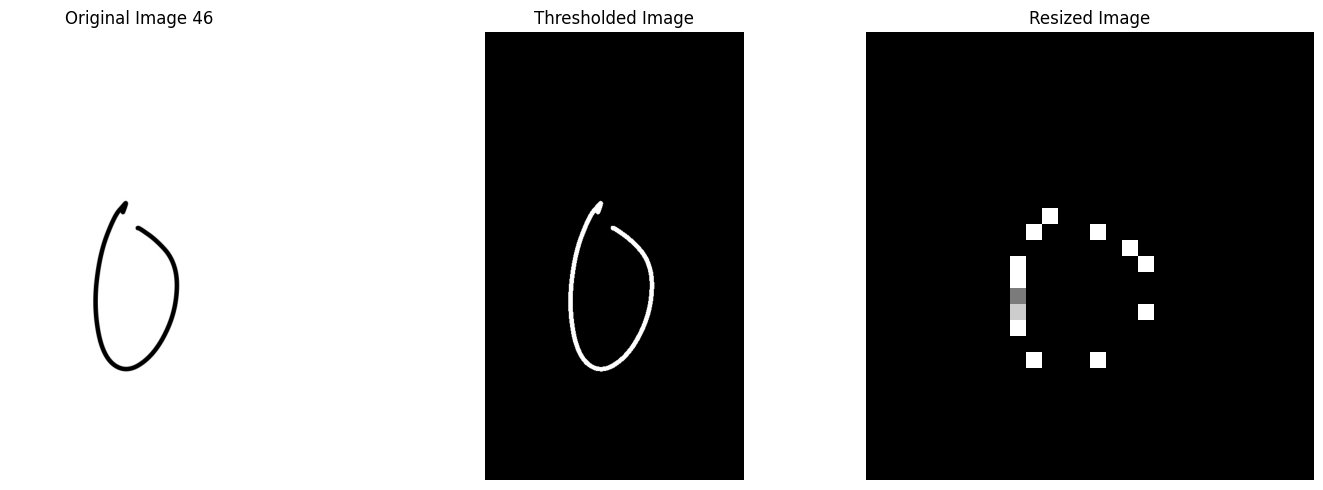

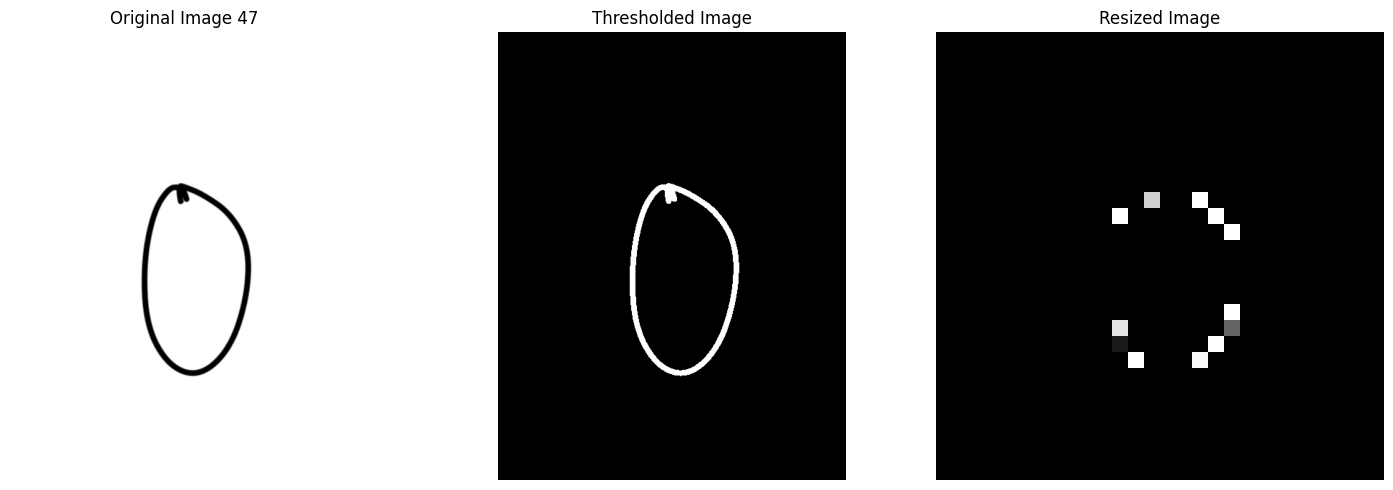

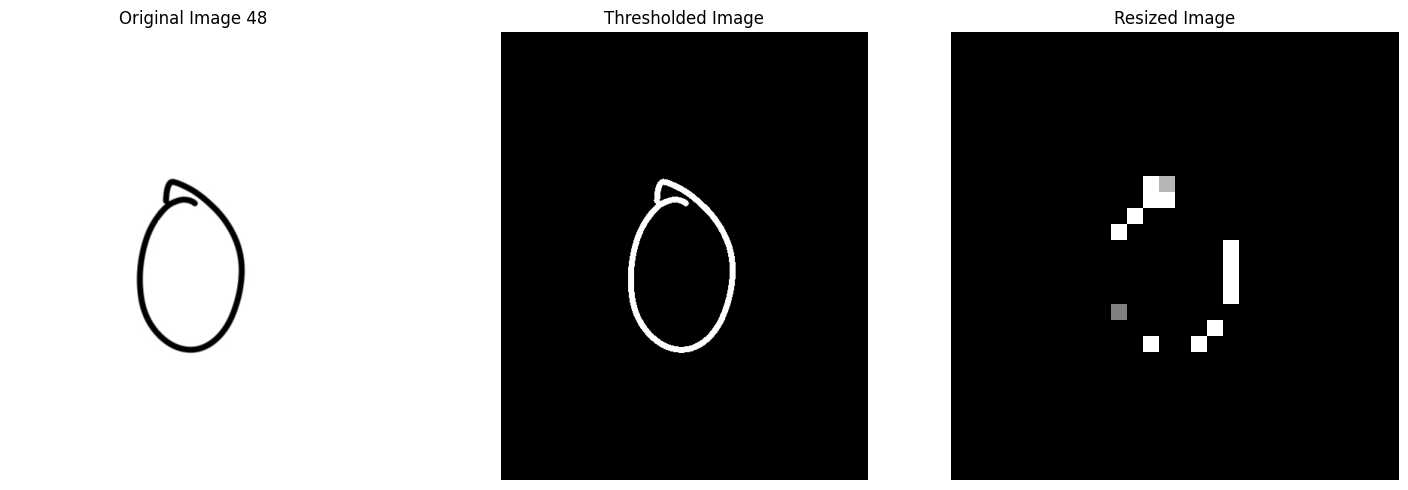

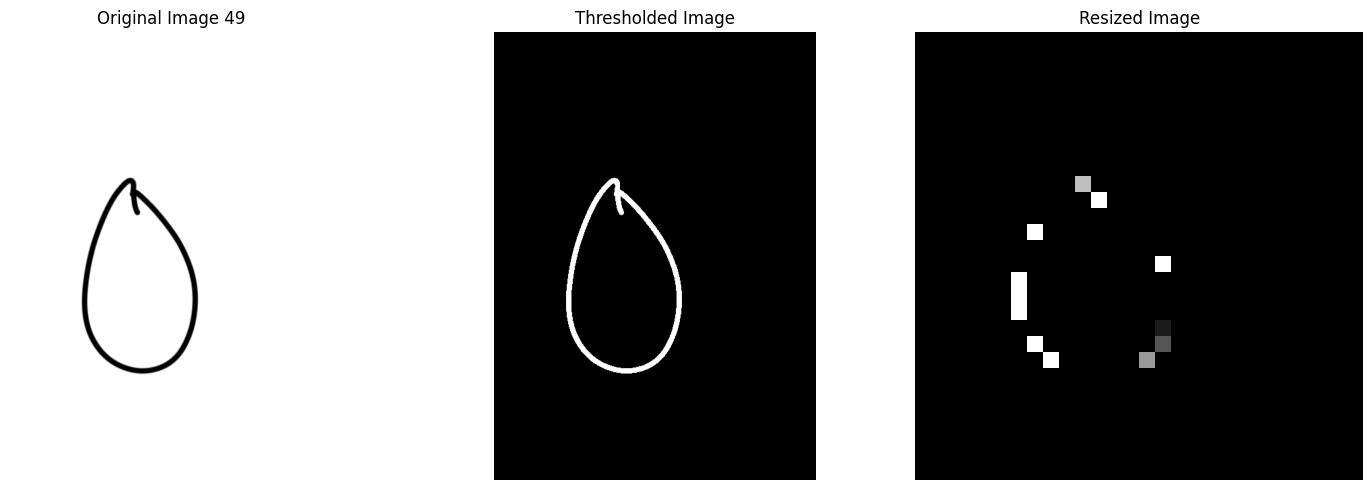

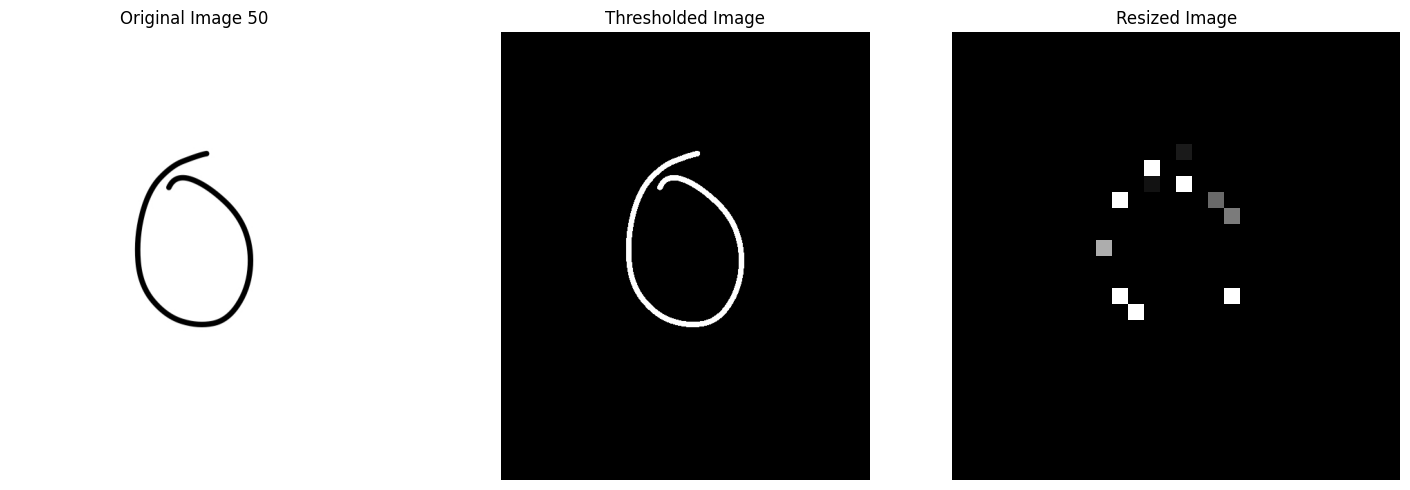

In [63]:
import cv2
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')

# Initialize an empty list to store resized images
imagenes_redimensionadas = [] # This line initializes the list
data_direccion = "/content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros"

# Listar los archivos en el directorio
print("Archivos en el directorio:", os.listdir(data_direccion))

# Filtrar solo archivos .PNG (así guardé las fotos) y tomar todos
image_files = [f for f in sorted(os.listdir(data_direccion)) if f.endswith('.PNG')]

# Verificar si se encontraron imágenes
if len(image_files) == 0:
    print("No se encontraron imágenes en el directorio especificado.")
else:
    print(f"Archivos encontrados: {len(image_files)} imágenes")

    # Iterar sobre las imágenes
    for i, filename in enumerate(image_files):
        photo_filename = os.path.join(data_direccion, filename)

        # Cargar la imagen en escala de grises
        image = cv2.imread(photo_filename, cv2.IMREAD_GRAYSCALE)

        # Verificar si la imagen se cargó correctamente
        if image is None:
            print(f"Error al cargar la imagen: {photo_filename}")
            continue  # Saltar a la siguiente imagen si no se pudo cargar

        # Aplicar umbralización para obtener una imagen binaria
        _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

        # Redimensionar la imagen a 28x28 píxeles
        resized = cv2.resize(thresh, (28, 28))

        # Agregar la imagen redimensionada a la lista
        imagenes_redimensionadas.append(resized)

        # Mostrar las imágenes
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Imagen original
        axes[0].imshow(image, cmap='gray')
        axes[0].set_title(f'Original Image {i+1}')
        axes[0].axis('off')

        # Imagen umbralizada
        axes[1].imshow(thresh, cmap='gray')
        axes[1].set_title('Thresholded Image')
        axes[1].axis('off')

        # Imagen redimensionada
        axes[2].imshow(resized, cmap='gray')
        axes[2].set_title('Resized Image')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()


Para cada imagen, se llama a la función process_and_predict que procesa la imagen y hace una predicción utilizando un modelo previamente entrenado. Los resultados de las predicciones se almacenan en una lista.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


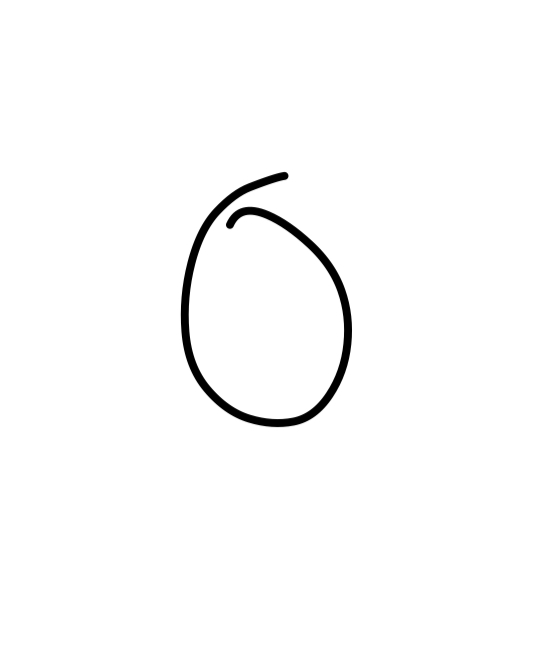

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/0.0.PNG
Predicción: 3, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


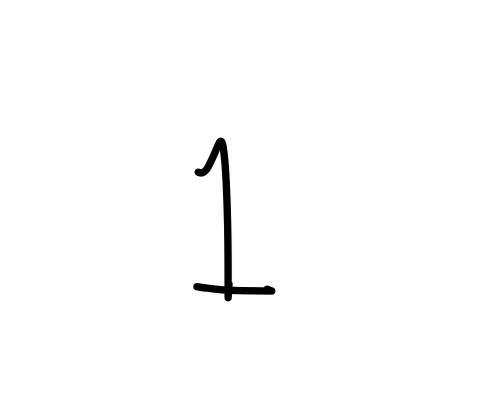

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/1.0.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


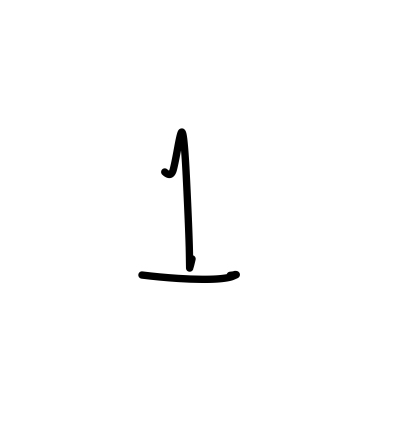

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/1.1.PNG
Predicción: 3, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


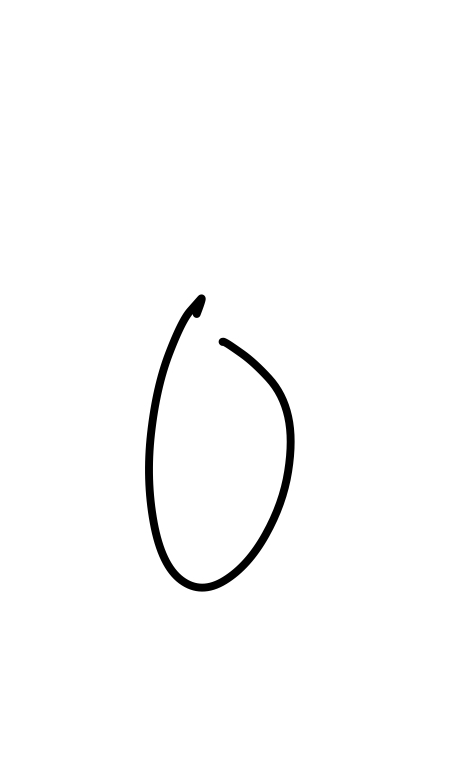

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/0.1.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


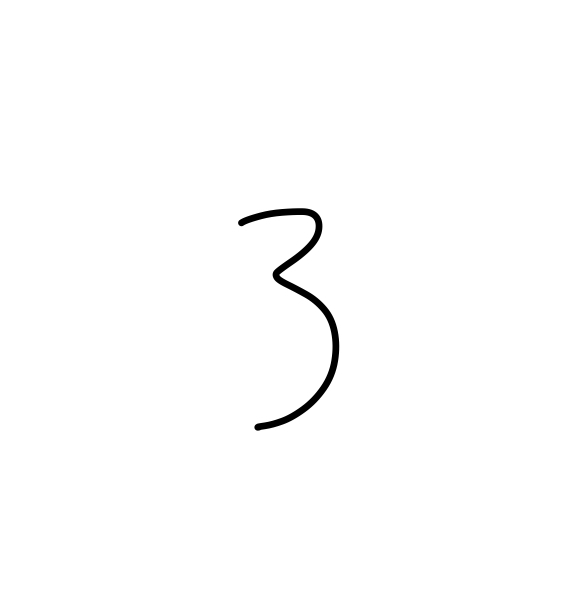

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/3.0.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


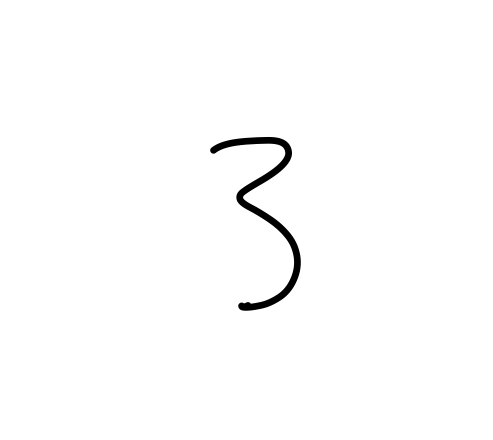

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/3.1.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


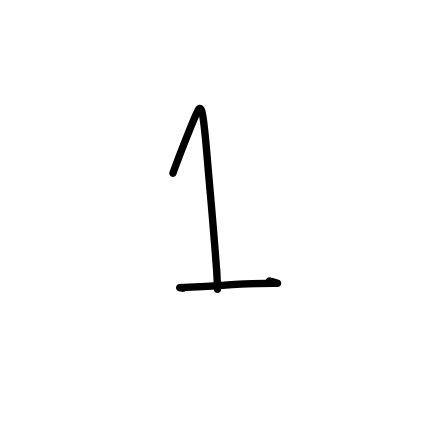

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/1.2.PNG
Predicción: 6, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


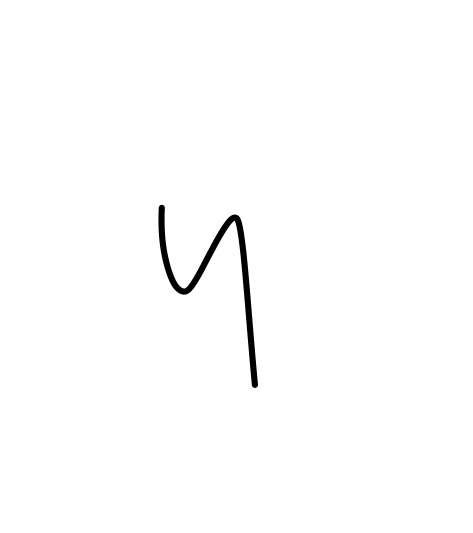

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/4.0.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


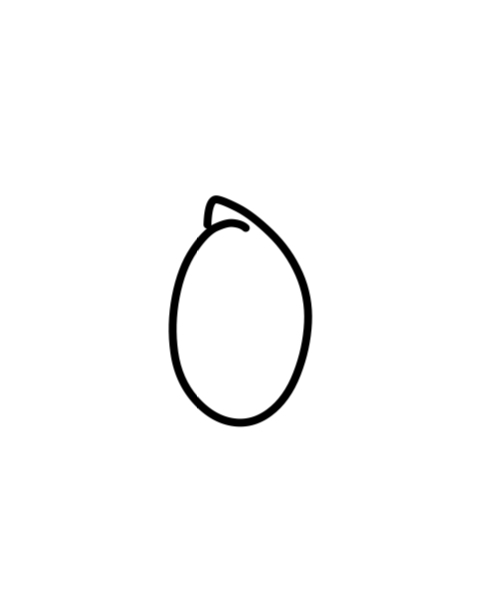

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/0.2.PNG
Predicción: 2, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


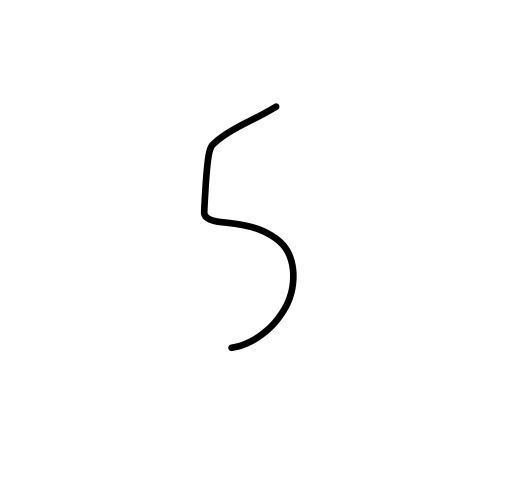

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/5.0.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


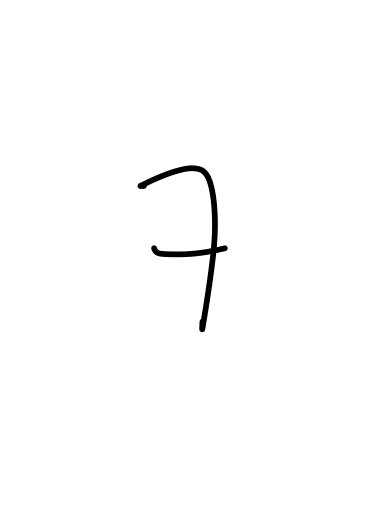

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/7.0.PNG
Predicción: 5, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


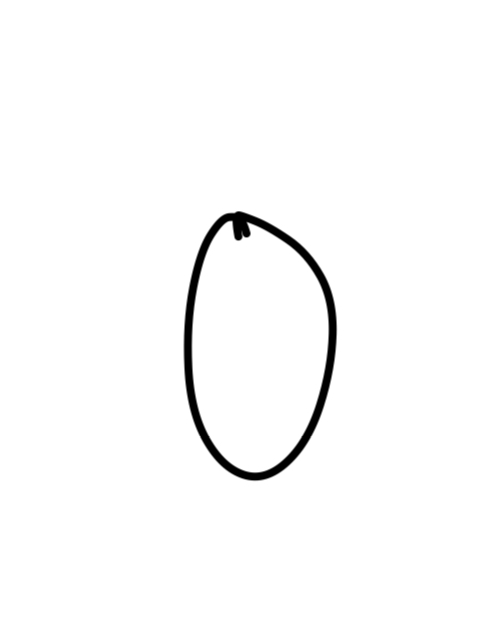

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/0.3.PNG
Predicción: 2, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


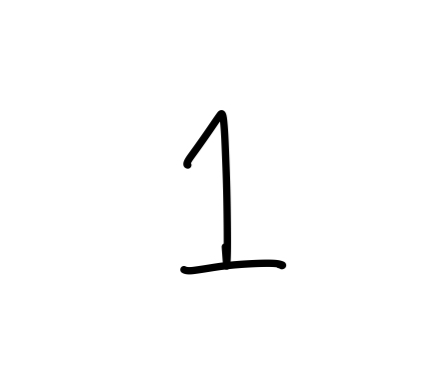

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/1.3.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


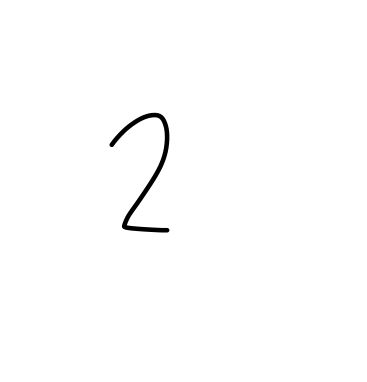

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/2.0.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


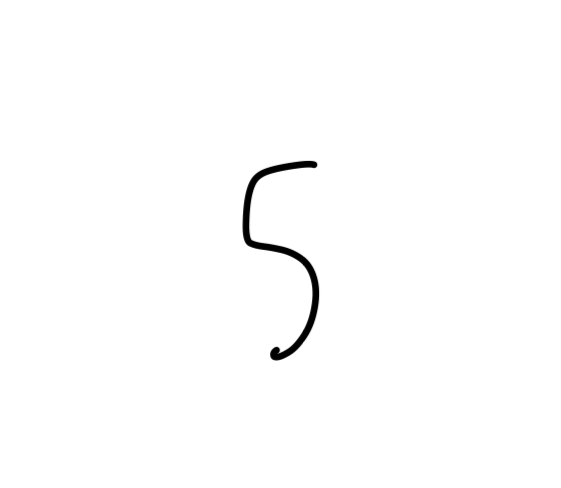

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/5.3.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


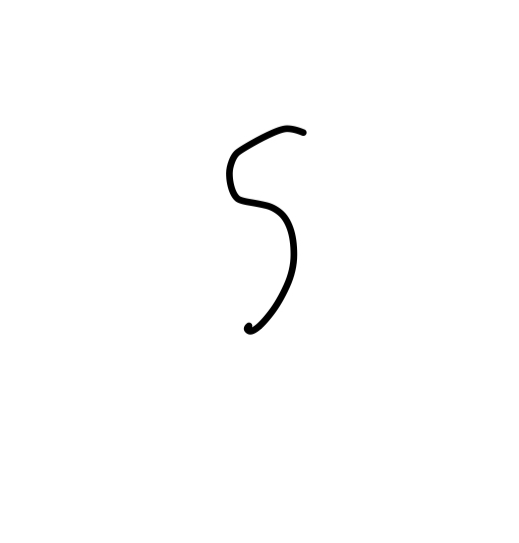

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/5.1.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


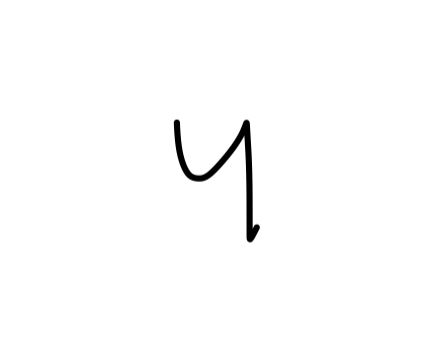

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/4.1.PNG
Predicción: 2, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


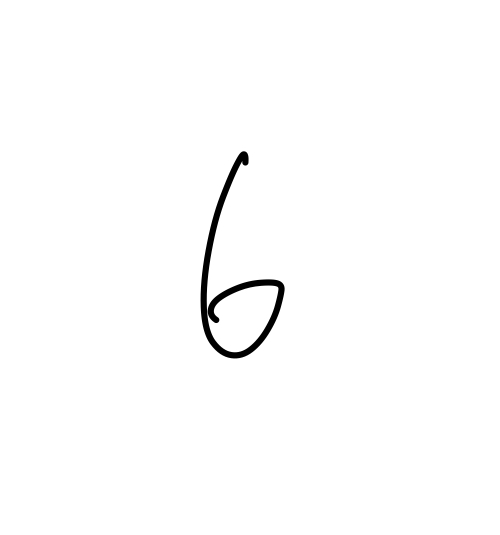

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/6.0.PNG
Predicción: 3, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


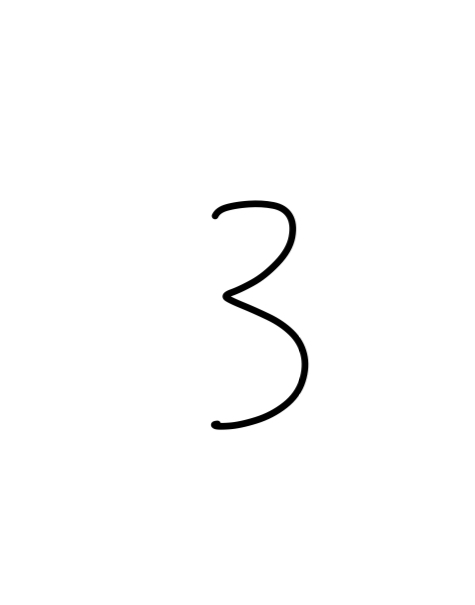

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/3.2.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


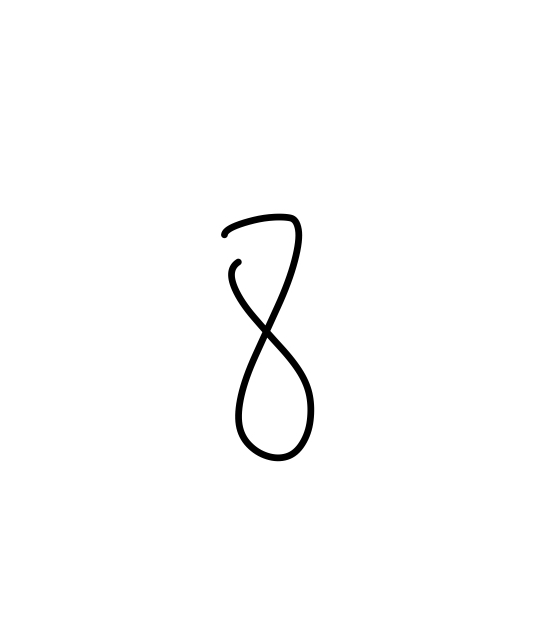

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/8.0.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


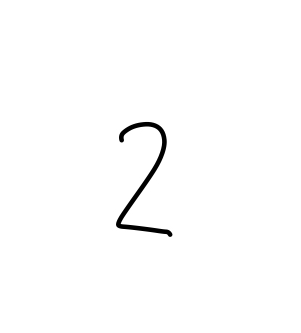

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/2.1.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


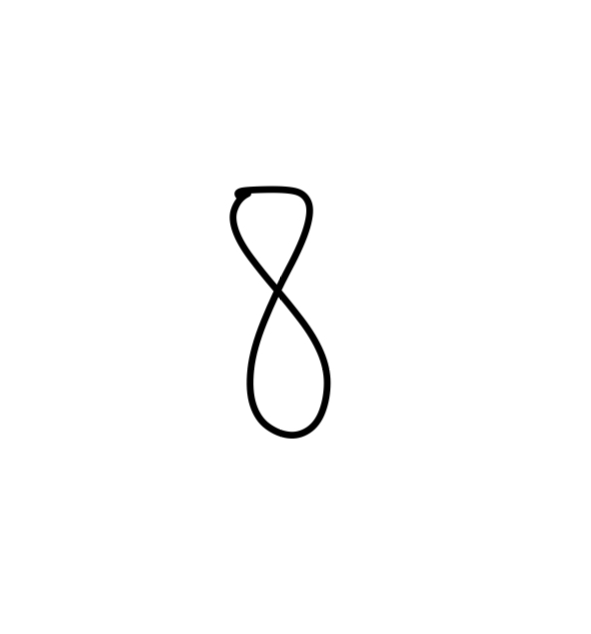

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/8.2.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


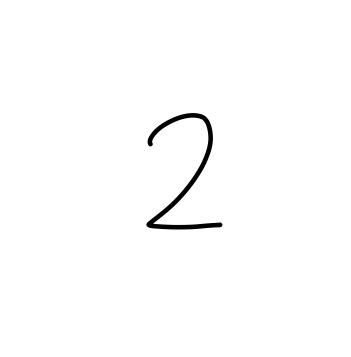

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/2.4.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


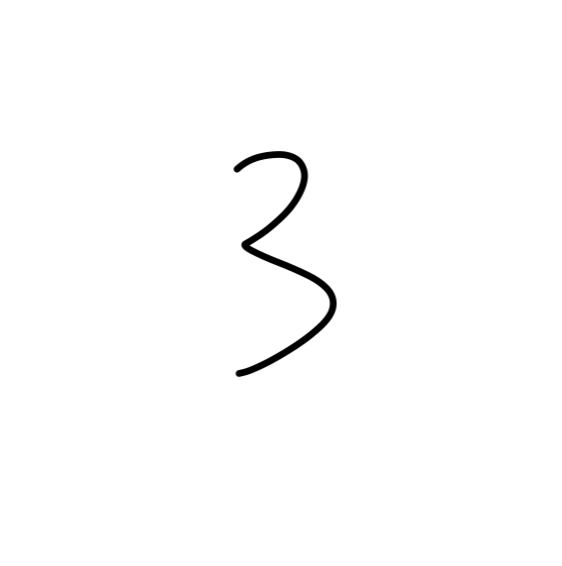

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/3.4.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


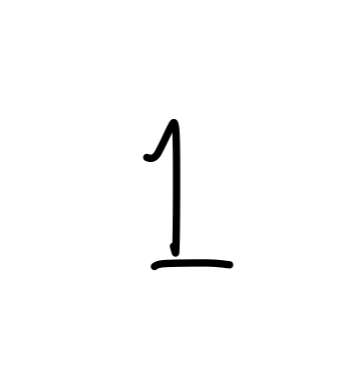

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/1.4.PNG
Predicción: 2, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


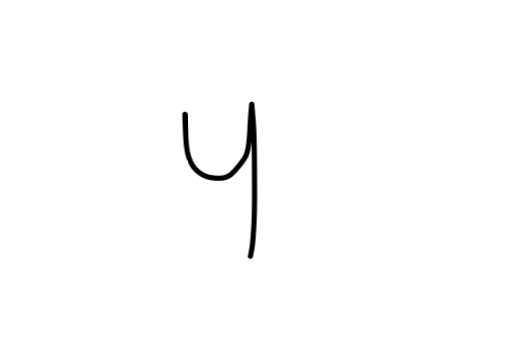

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/4.4.PNG
Predicción: 6, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


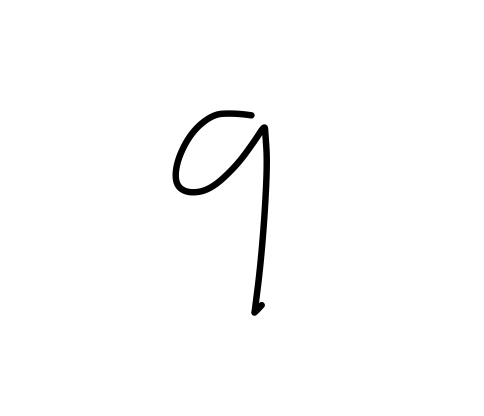

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/9.0.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


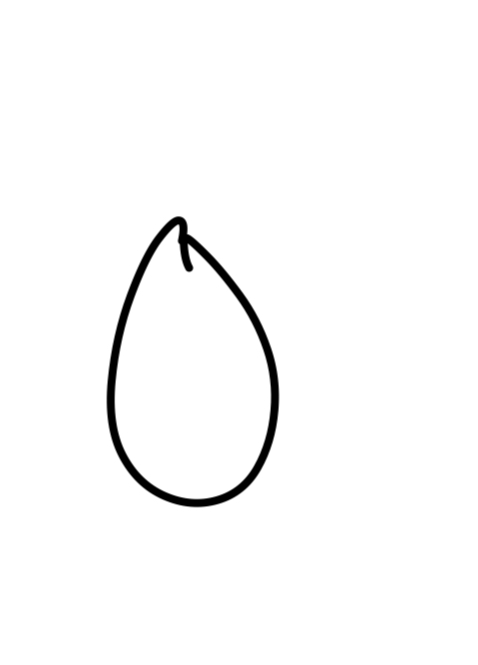

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/0.4.PNG
Predicción: 7, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


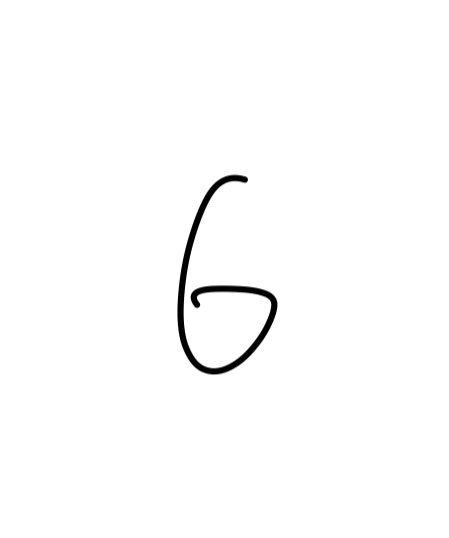

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/6.2.PNG
Predicción: 2, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


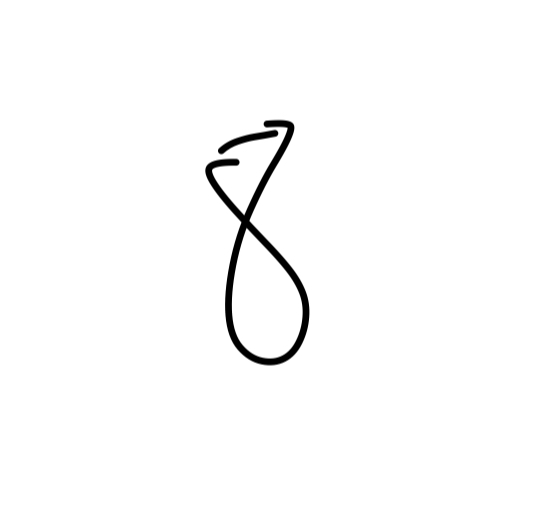

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/8.1.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


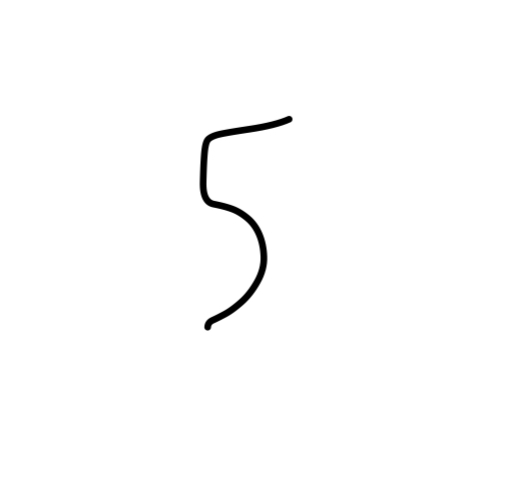

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/5.4.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


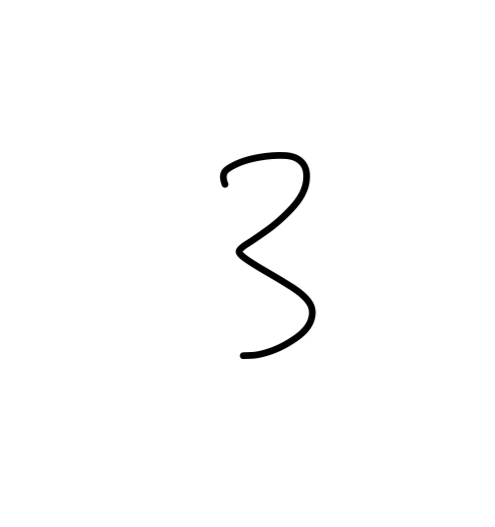

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/3.3.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


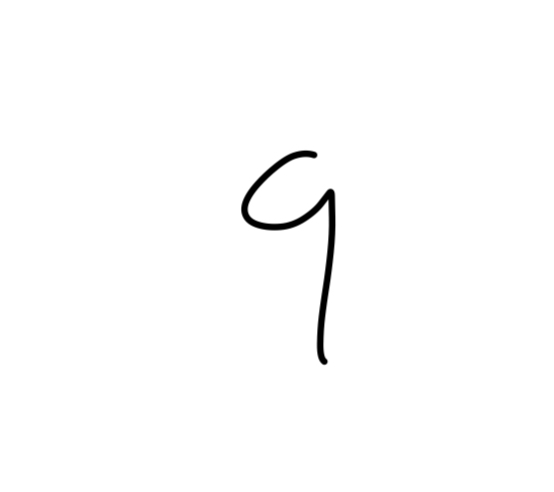

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/9.2.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


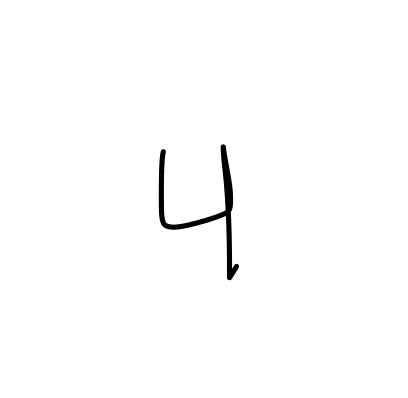

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/4.2.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


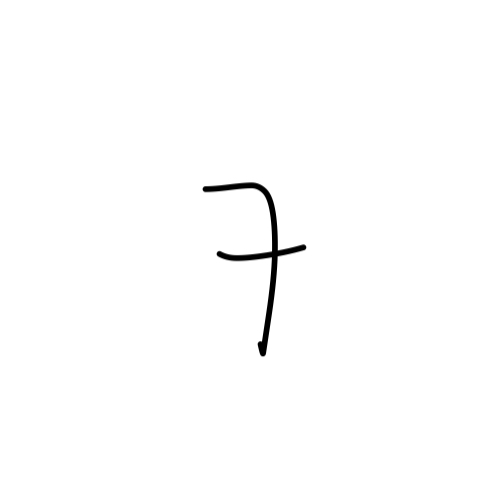

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/7.1.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


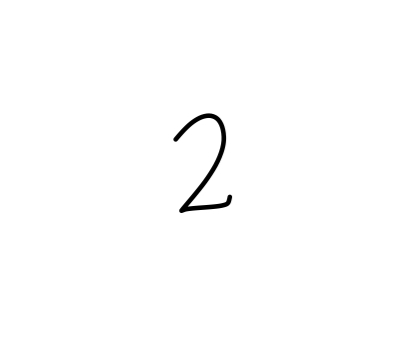

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/2.3.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


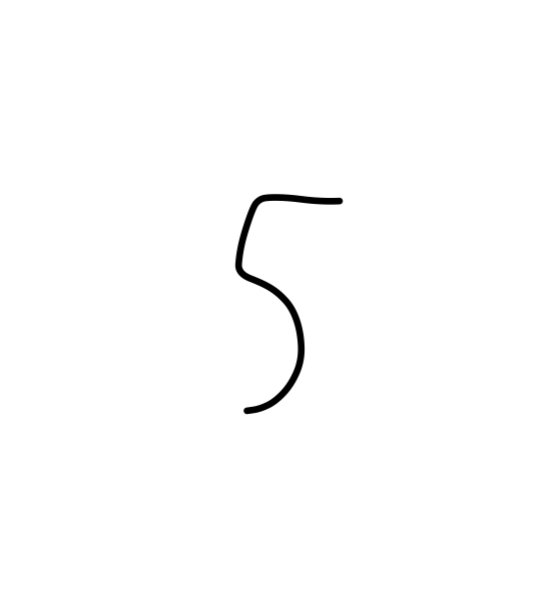

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/5.2.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


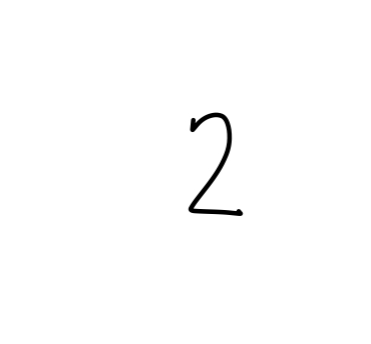

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/2.2.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


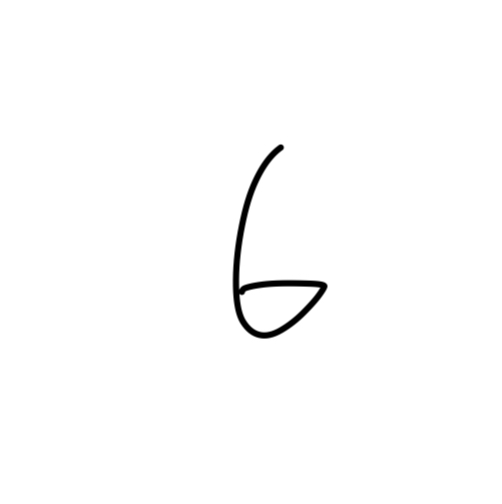

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/6.4.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


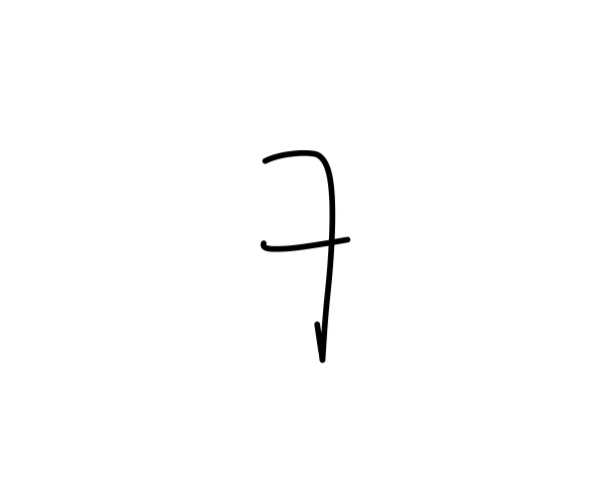

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/7.2.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


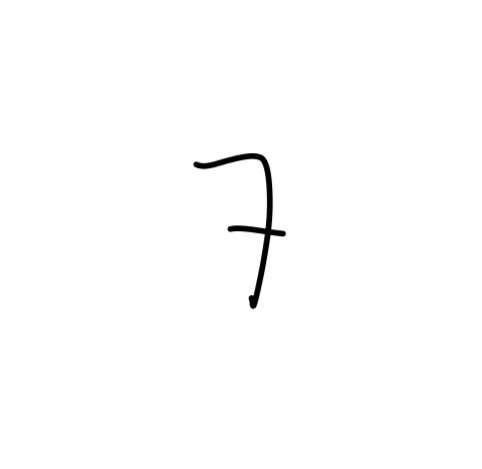

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/7.4.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


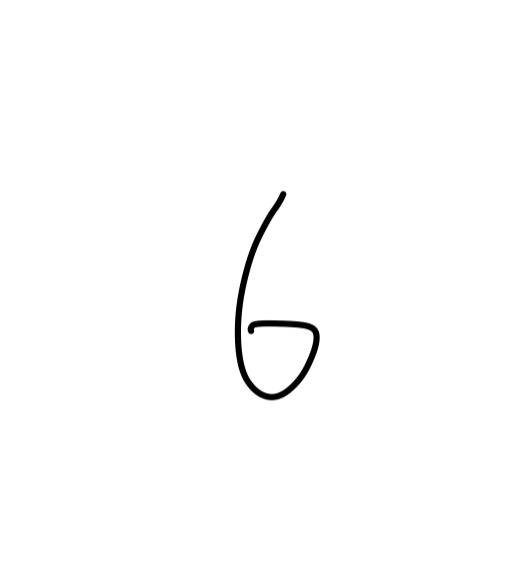

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/6.1.PNG
Predicción: 2, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


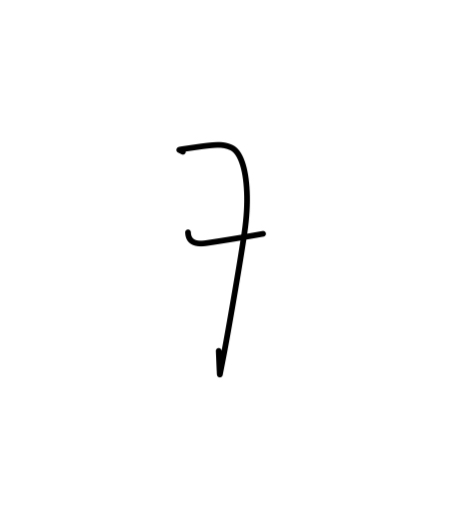

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/7.3.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


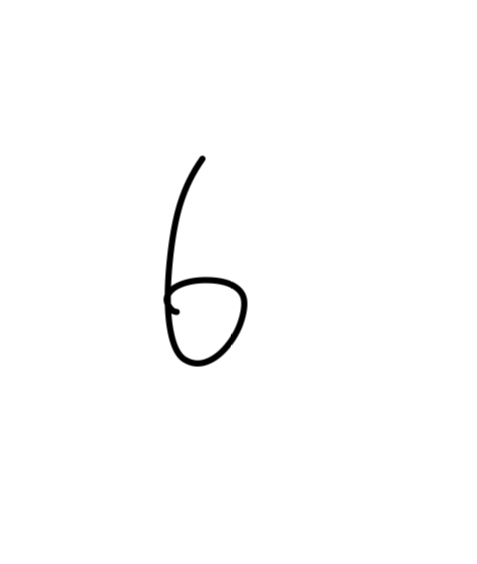

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/6.3.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


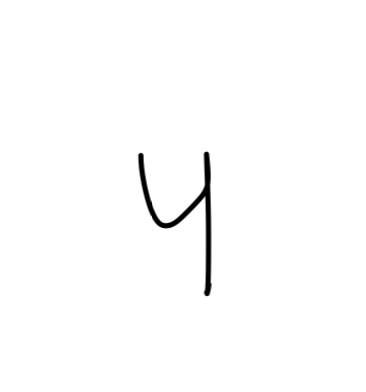

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/4.3.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


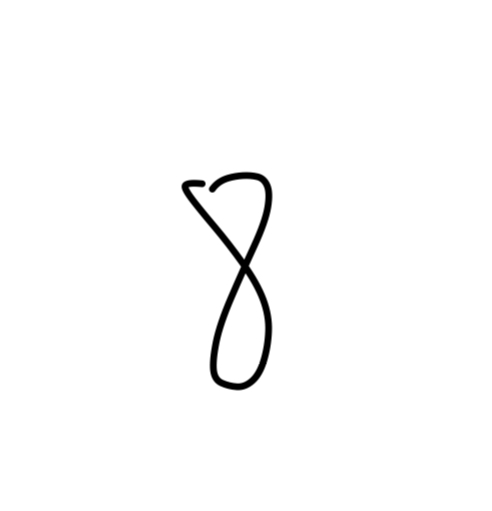

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/8.4.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


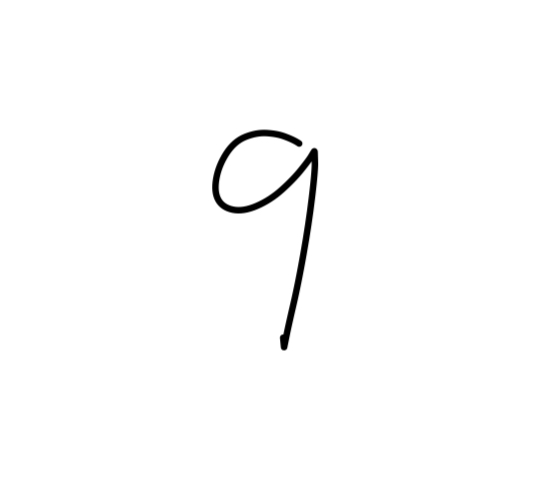

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/IMG_1898.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


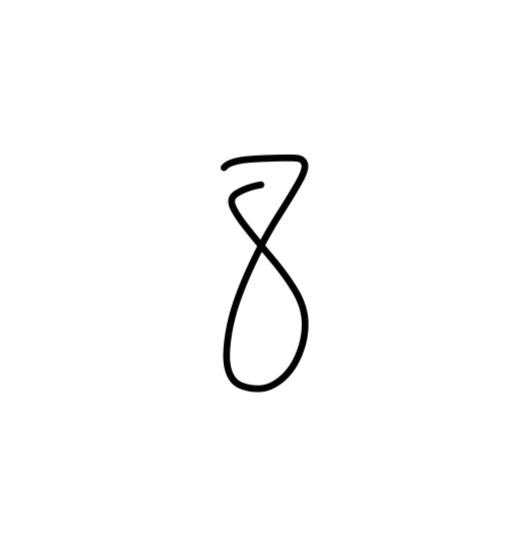

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/8.3.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


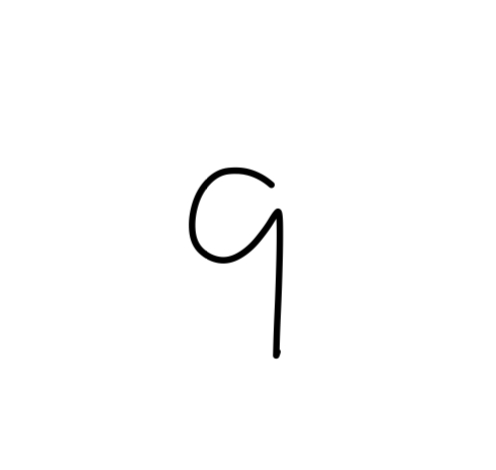

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/9.1.PNG
Predicción: 1, Probabilidad: 1.0000
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


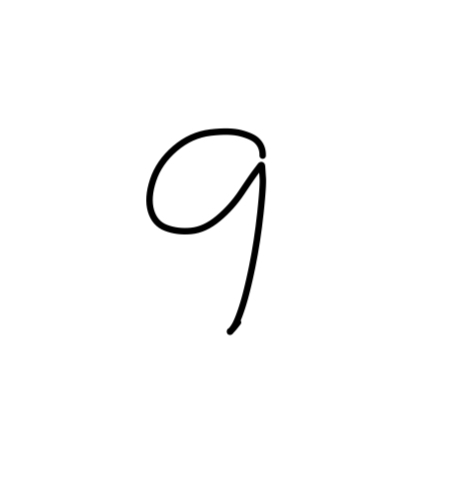

Imagen: /content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros/9.3.PNG
Predicción: 3, Probabilidad: 1.0000
--------------------------------------------------
Resultados de las predicciones:
                                           image_path  predicted_label  \
0   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                3   
1   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                1   
2   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                3   
3   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                1   
4   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                1   
5   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                1   
6   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                6   
7   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                1   
8   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                2   
9   /content/drive/MyDrive/UDEM/Semestre 6/AI/Foto...                1

In [72]:
import os
import pandas as pd

# Ruta de acceso a la carpeta de datos
folder = "/content/drive/MyDrive/UDEM/Semestre 6/AI/FotosNumeros"

# Lista para almacenar resultados de cada imagen
all_results = []

# Bucle para recorrer todas las imágenes en la carpeta y hacer una predicción para cada una
for filename in os.listdir(folder):
    if filename.endswith('.jpg') or filename.endswith('.PNG'):
        image_path = os.path.join(folder, filename)
        result = process_and_predict(image_path, model)  # Procesa y predice para la imagen
        if result:  # Solo añade el resultado si fue exitoso
            all_results.append(result)

# Crear un DataFrame con todos los resultados
df_results = pd.DataFrame(all_results)

# Mostrar la tabla final con todos los resultados
print("Resultados de las predicciones:")
print(df_results)

Podemos darnos cuenta que el modelo NO sirve... jajaja... no hace ninguna predicción bien...

Creo que los errores se pueden deber al redimensionamiento de las imágenes que puede alterar su forma original, lo que podría provocar distorsiones, como cuando una imagen se aplasta o se adelgaza... También, dado que yo dibujé las imágenes de los números, es posible que el tipo de letra utilizado sea diferente al que el modelo fue entrenado para reconocer.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4447 - loss: 1.7666 - val_accuracy: 0.8588 - val_loss: 0.5921 - learning_rate: 1.0000e-04
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7993 - loss: 0.6961 - val_accuracy: 0.8924 - val_loss: 0.4032 - learning_rate: 1.0000e-04
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8503 - loss: 0.5152 - val_accuracy: 0.9047 - val_loss: 0.3433 - learning_rate: 1.0000e-04
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8730 - loss: 0.4332 - val_accuracy: 0.9109 - val_loss: 0.3098 - learning_rate: 1.0000e-04
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8847 - loss: 0.3984 - val_accuracy: 0.9170 - val_loss: 0.2841 - learning_rate: 1.0000e-04
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8975 - loss: 0.3555 - val_accuracy: 0.9220 - val_loss: 0.2625 - learning_rate: 1.0000e-04
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 

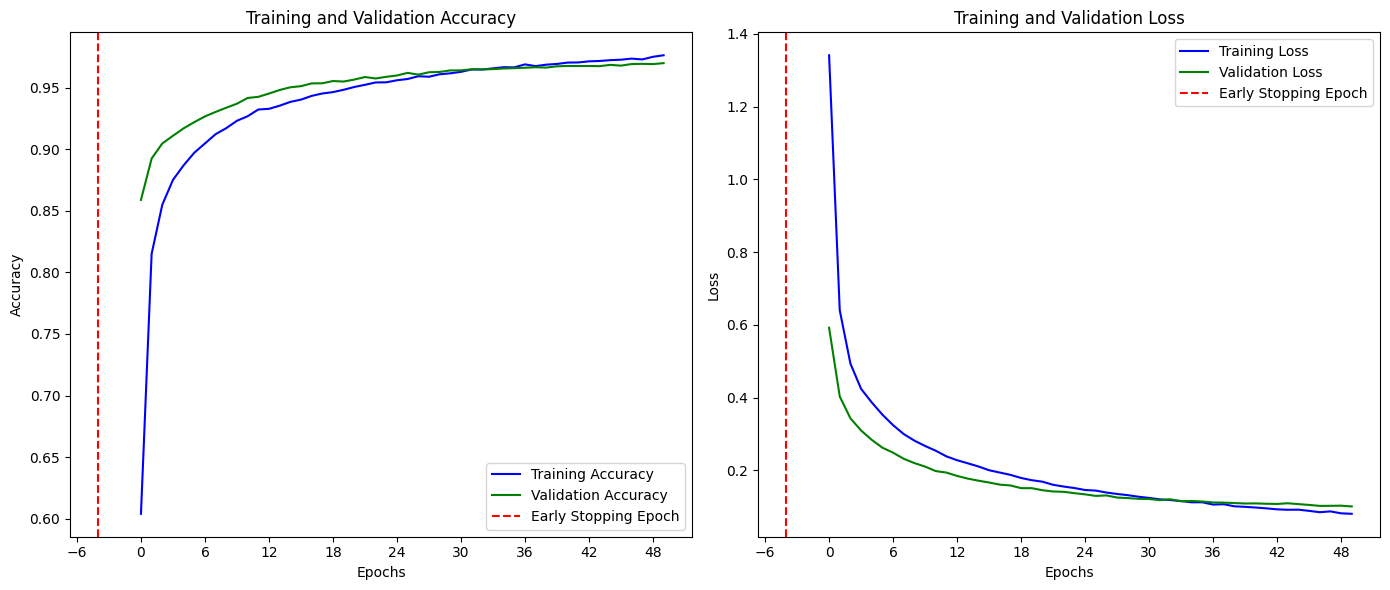

In [74]:
# Import dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Aplicar CLAHE para mejorar el contraste de la imagen
import cv2
import numpy as np

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Definir parámetros de CLAHE
train_images = np.array([clahe.apply(image) for image in train_images])  # Aplicar CLAHE a cada imagen de entrenamiento
test_images = np.array([clahe.apply(image) for image in test_images])  # Aplicar CLAHE a cada imagen de test

# Normalizar las imágenes entre 0 y 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Import keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Crear la red neuronal
model = Sequential()
# Capa de entrada: aplanar las imágenes de 28x28
model.add(Flatten(input_shape=(28, 28)))
# Capa Oculta 1: 128 neuronas con activación ReLU
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Dropout para prevenir el sobreajuste
# Capa Oculta 2: 64 neuronas con activación ReLU
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout para prevenir el sobreajuste
# Capa de salida: 10 unidades para 10 clases con activación softmax
model.add(Dense(10, activation='softmax'))

# Especificar optimizador
opt = Adam(learning_rate=0.0001)
# Compilar el modelo
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen de la arquitectura
model.summary()

# Crear callbacks de early stopping y reducción de tasa de aprendizaje
early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.4, batch_size=80, callbacks=[early_stop, reduce_lr])

# Obtener el índice de la época de parada temprana
stopped_epoch = early_stop.stopped_epoch
best_epoch = stopped_epoch - early_stop.patience

# Obtener la exactitud final en entrenamiento y validación
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Imprimir la exactitud final
print(f'Final Training Accuracy: {train_accuracy:.4f}')
print(f'Final Validation Accuracy: {val_accuracy:.4f}')
print(f'Final Training Loss: {train_loss:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

# Gráfico de precisión de entrenamiento y validación
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(14, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Asegurar valores enteros en el eje x
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='g')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Asegurar valores enteros en el eje x
plt.legend()

# Ajuste de la presentación
plt.tight_layout()
plt.show()

# Guardar el modelo
model.save("my_model_new.h5")

Mejoras realizadas:

Normalización de Imágenes:
Al dividir las imágenes entre 255, los valores de píxel se ajustan al rango de 0 a 1, lo que mejora la convergencia del modelo. Este paso es crucial porque las redes neuronales suelen entrenar más rápido y con mayor estabilidad cuando los datos de entrada están normalizados.

Uso de Dropout para Prevenir el Sobreajuste:
El Dropout se agrega a las capas ocultas para evitar que el modelo dependa demasiado de neuronas específicas, lo que ayuda a prevenir el sobreajuste. Esto mejora la capacidad del modelo para generalizar y mejorar su desempeño en datos nuevos, no vistos durante el entrenamiento.

Uso de Early Stopping y Reducción de la Tasa de Aprendizaje:
El EarlyStopping detiene el entrenamiento cuando la precisión de validación no mejora, evitando sobreentrenar el modelo. Además, la técnica ReduceLROnPlateau ajusta la tasa de aprendizaje cuando el modelo se estanca, ayudando a que el entrenamiento sea más eficiente y preciso en las últimas etapas.

Mejora del Contraste con CLAHE:
Al aplicar CLAHE, se mejora el contraste de las imágenes adaptativamente, lo que permite que el modelo distinga mejor los detalles finos de las imágenes, como los bordes de los números. Este preprocesamiento es útil porque puede facilitar el aprendizaje de características más claras y distintivas, lo que potencialmente mejora la precisión del modelo al reconocer patrones en imágenes con iluminación y contrastes variables.